In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

LOGISTIC REGRESSION
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the St-cloud/deploy-your-app 
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



In [375]:
#target column is 'survived' .which indicates wheather a passenger survived or not (1 for survived and 0 for not survived)
titanic_train_data=pd.read_csv('Titanic_train.csv')
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [376]:
titanic_test_data=pd.read_csv('Titanic_test.csv')
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [377]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [378]:
#ssome columns are not useful for prediction so we deleted that columns.
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic_train_data.drop(columns=columns_to_drop, inplace=True)
titanic_test_data.drop(columns=columns_to_drop, inplace=True)

In [379]:
#1. Data Exploration:
#a. Load the dataset and perform exploratory data analysis (EDA).
#b. Examine the features, their types, and summary statistics.
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.
titanic_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [380]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [381]:
#2. Data Preprocessing:handling missing value
titanic_train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [382]:
titanic_test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [383]:
len(titanic_train_data)

891

In [384]:
len(titanic_test_data)

418

In [385]:
#Calculate the percentage of missig values in each column.
for i in titanic_train_data.isnull().sum():
    print((i/len(titanic_train_data))*100,'%')

0.0 %
0.0 %
0.0 %
19.865319865319865 %
0.0 %
0.0 %
0.0 %
0.22446689113355783 %


In [386]:
for i in titanic_test_data.isnull().sum():
    print((i/len(titanic_test_data))*100,'%')

0.0 %
0.0 %
20.574162679425836 %
0.0 %
0.0 %
0.23923444976076555 %
0.0 %


In [387]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [388]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [389]:
Embarked_mode=titanic_train_data['Embarked'].mode()[0]
Embarked_mode

'S'

In [390]:
Age_median = titanic_train_data['Age'].median()
Age_median

28.0

In [391]:
Age_median = titanic_test_data['Age'].median()
Age_median

27.0

In [392]:
Fare_median = titanic_test_data['Fare'].median()
Fare_median

14.4542

In [393]:
titanic_train_data['Age'].fillna(Age_median, inplace=True)

In [394]:
titanic_test_data['Age'].fillna(Age_median, inplace=True)

In [395]:
titanic_test_data['Fare'].fillna(Fare_median, inplace=True)

In [396]:
titanic_train_data['Embarked'].fillna(Embarked_mode, inplace=True)

In [397]:
titanic_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [398]:
titanic_test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

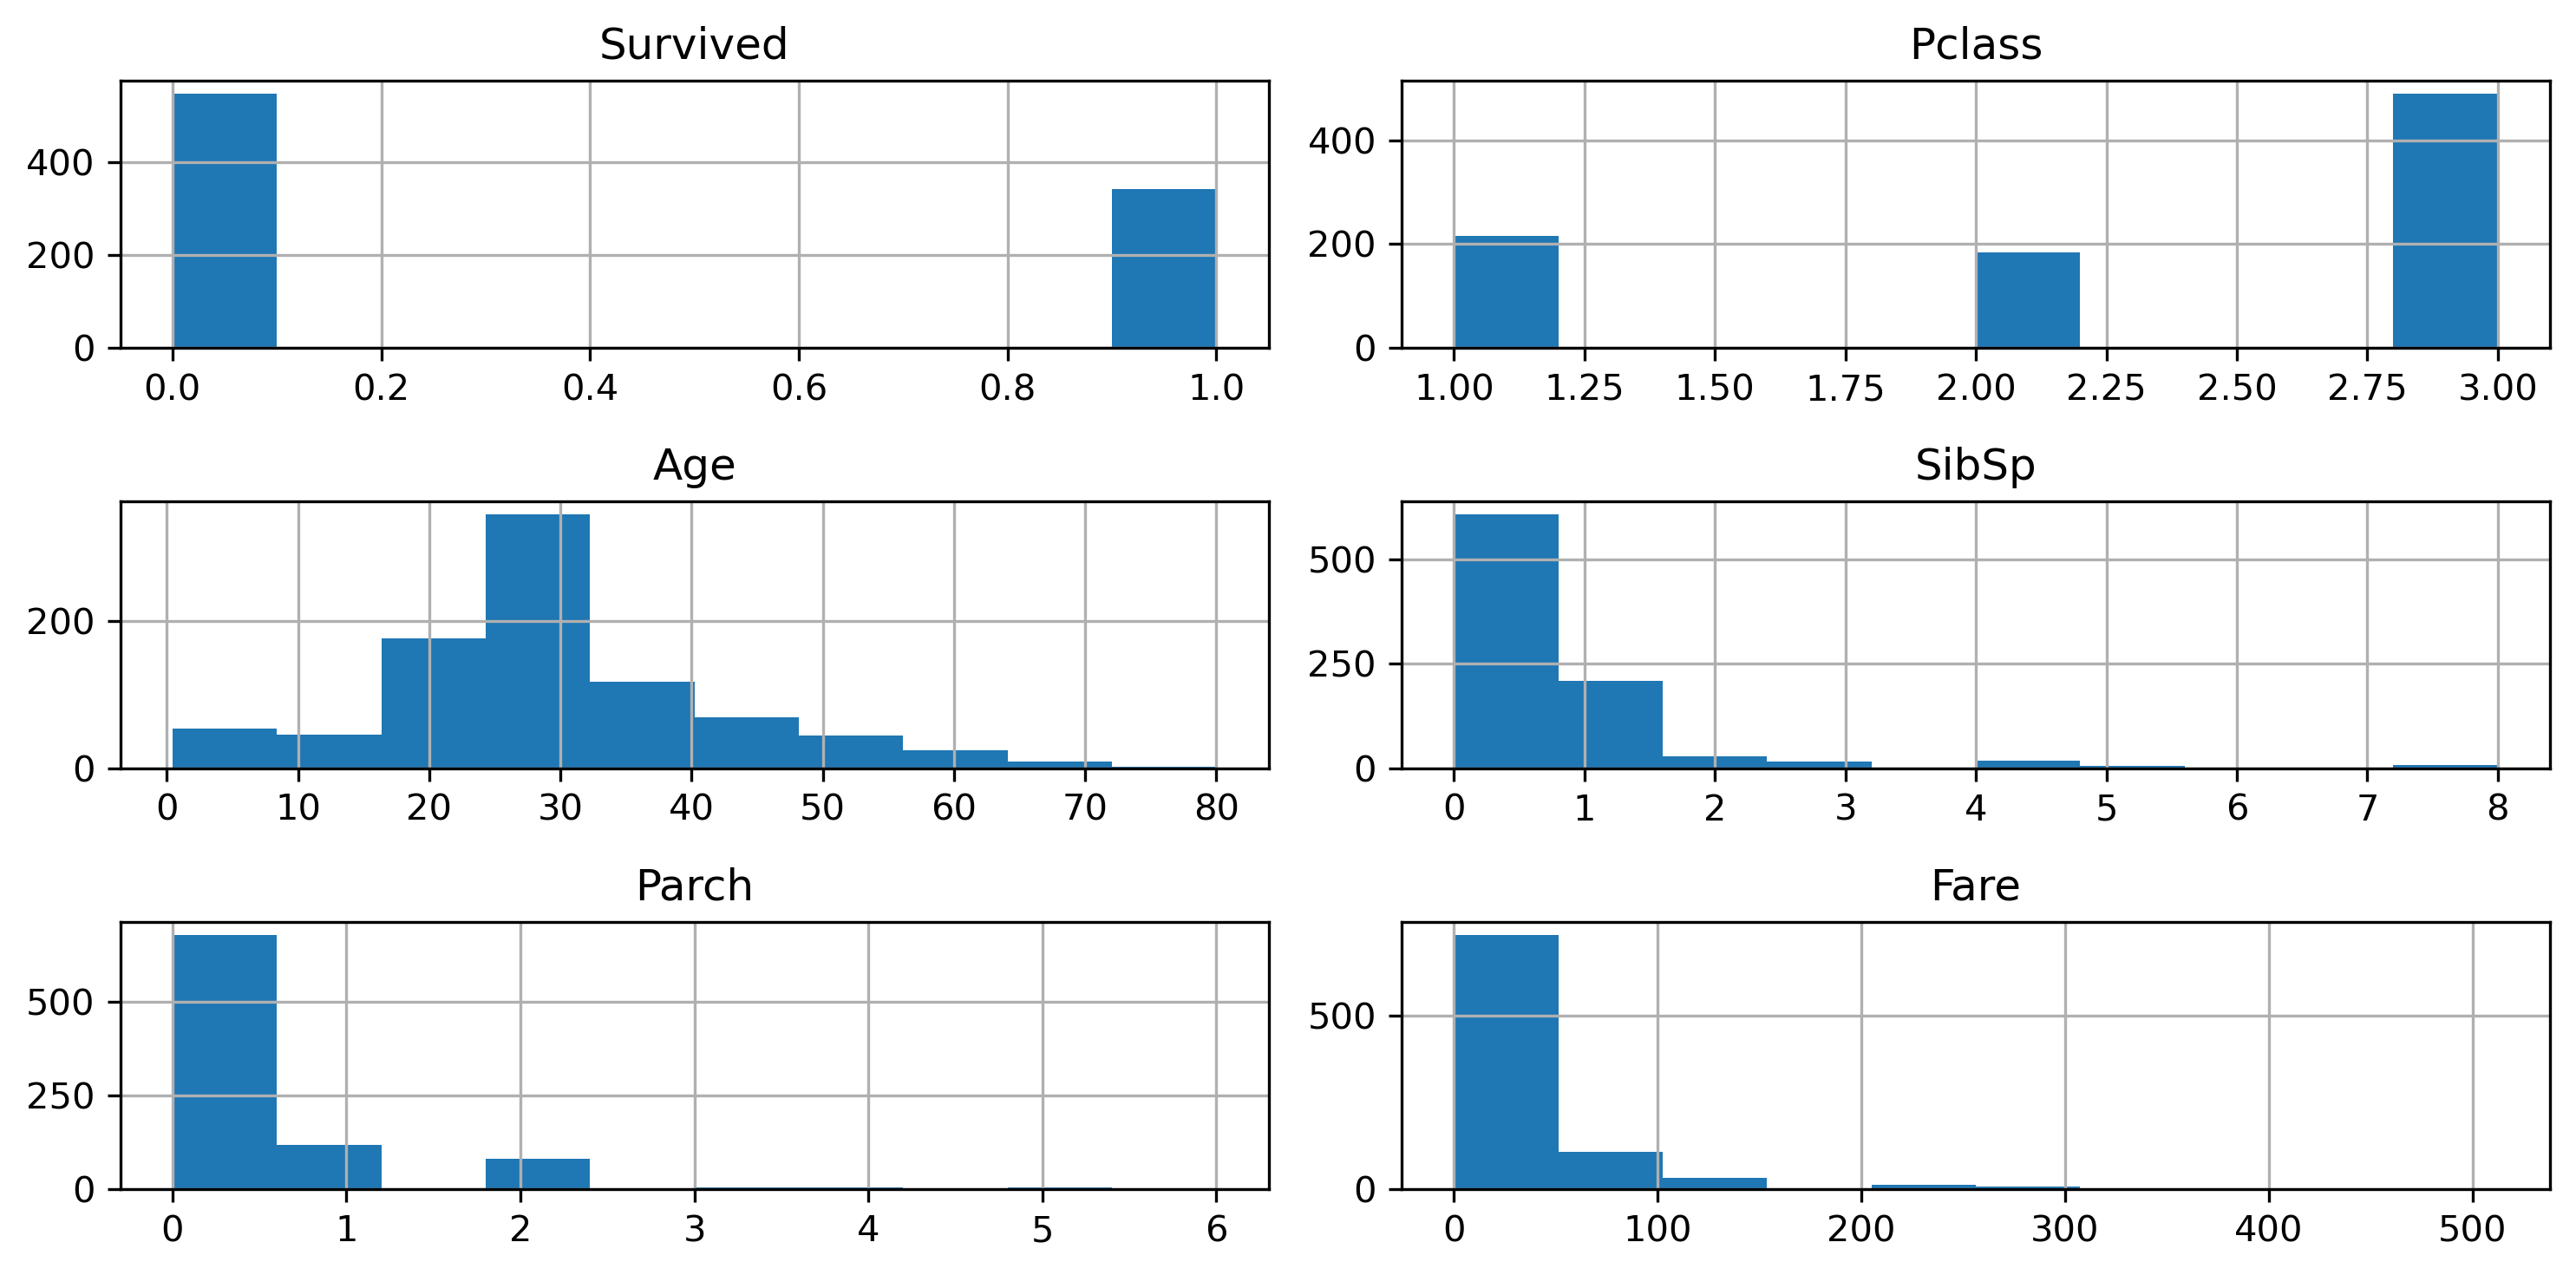

In [399]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_train_data.hist()
plt.tight_layout()

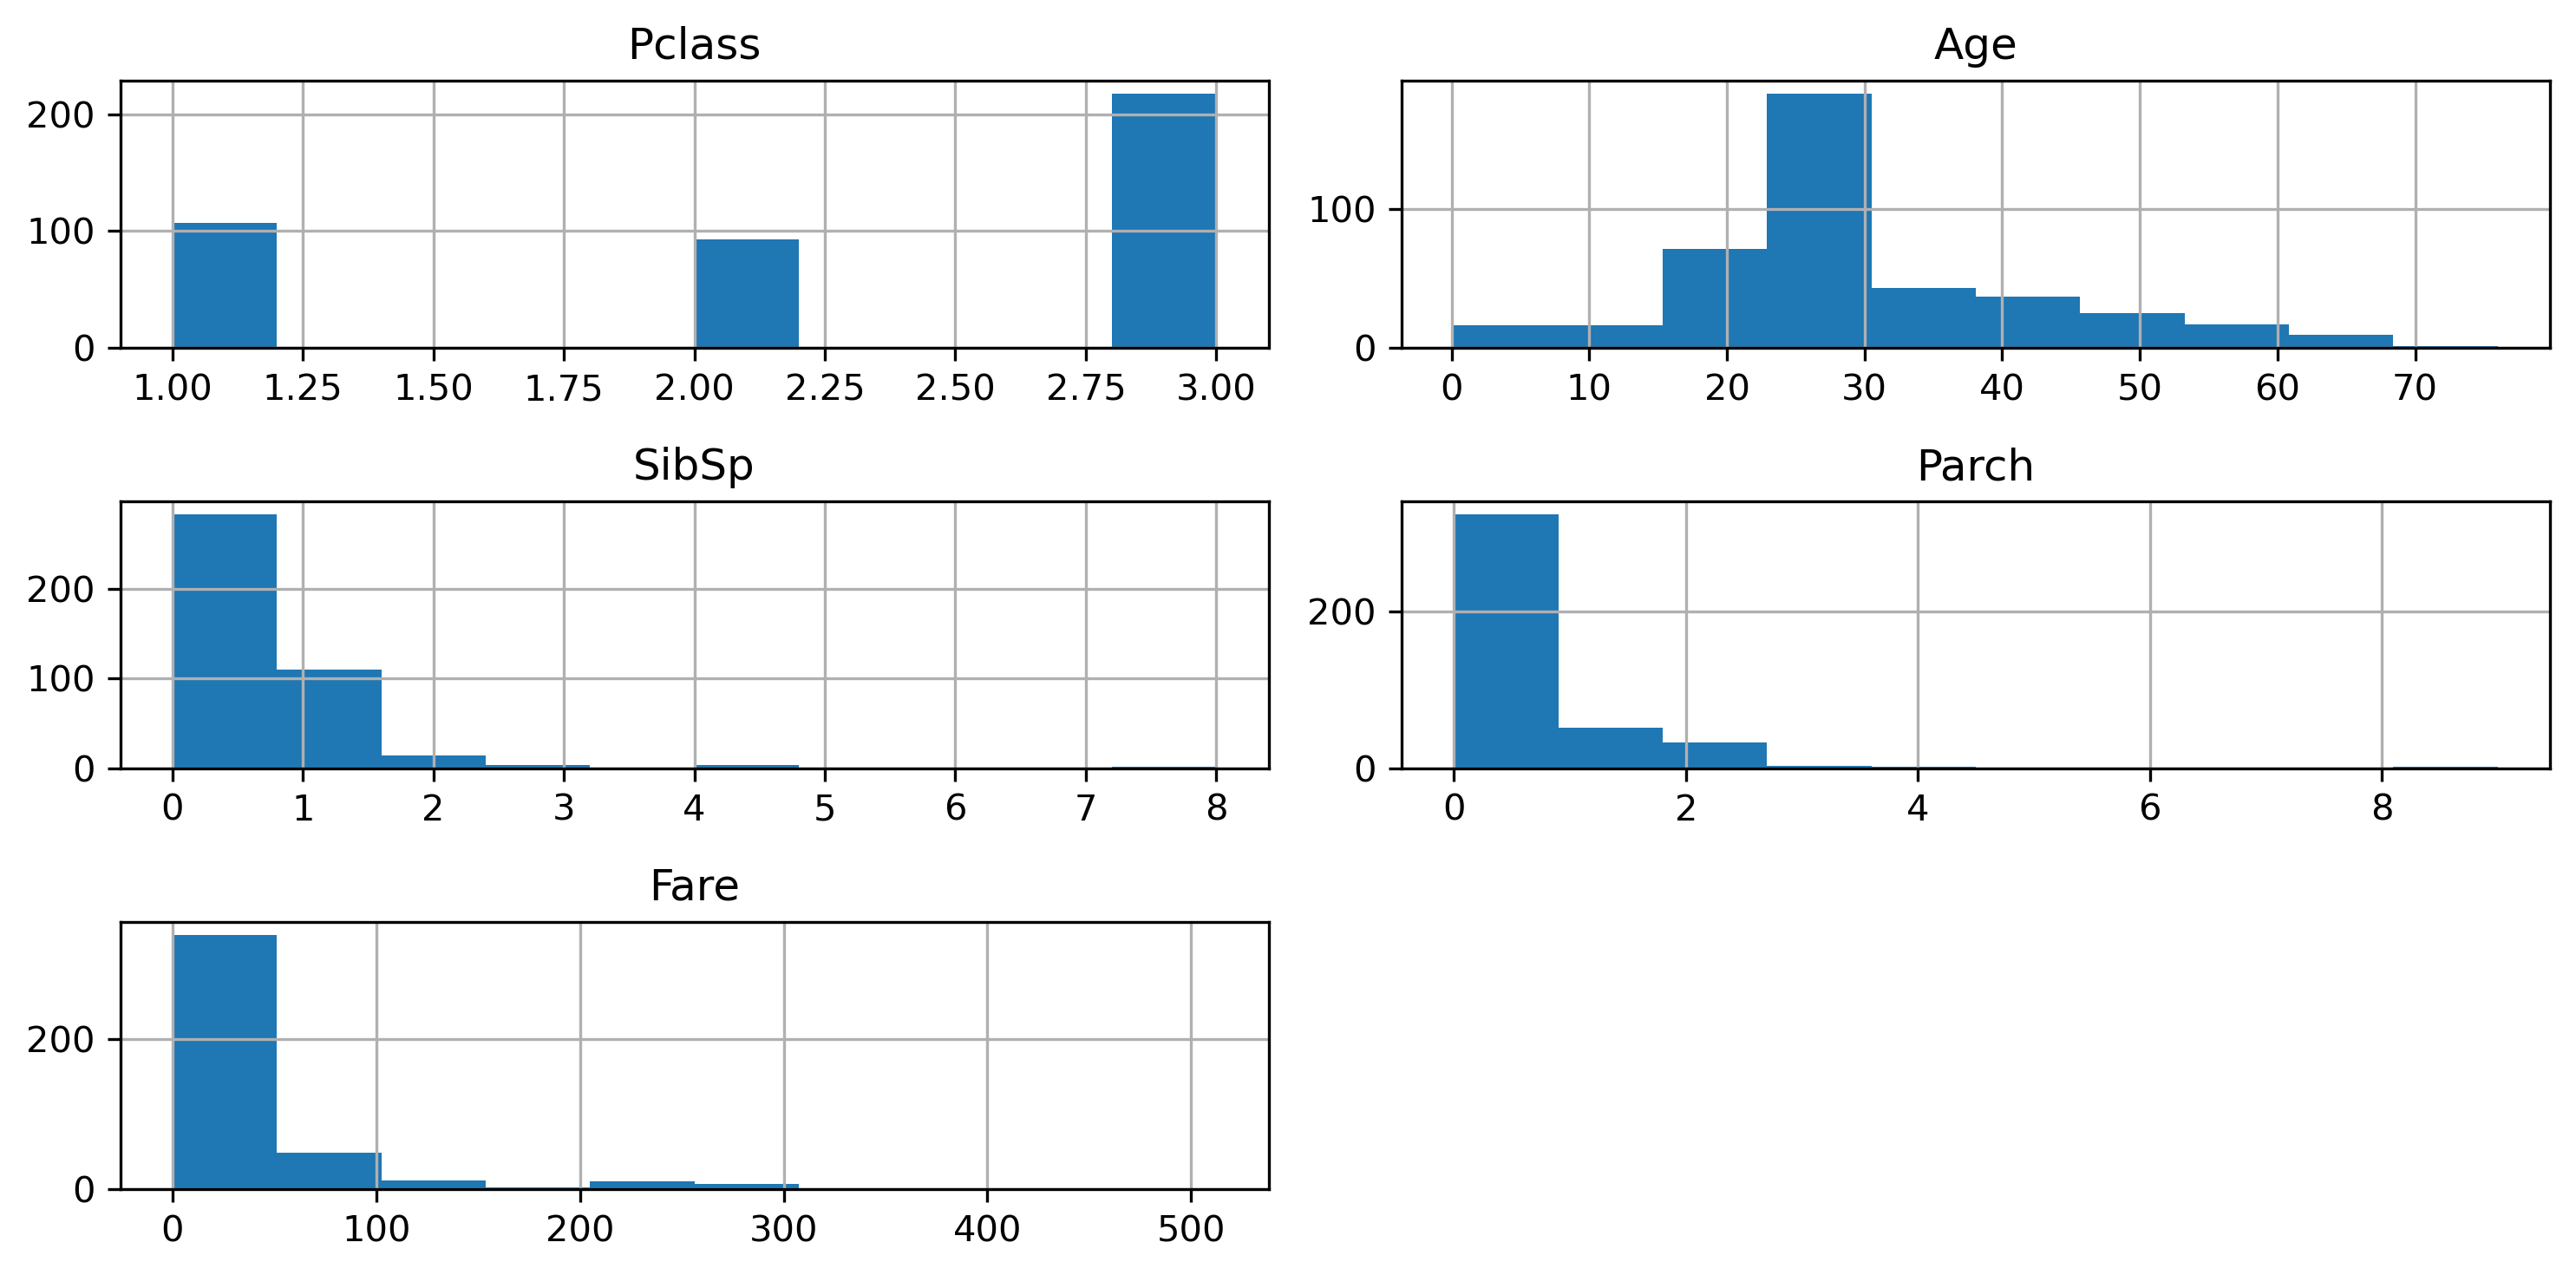

In [400]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_test_data.hist()
plt.tight_layout()

<Axes: >

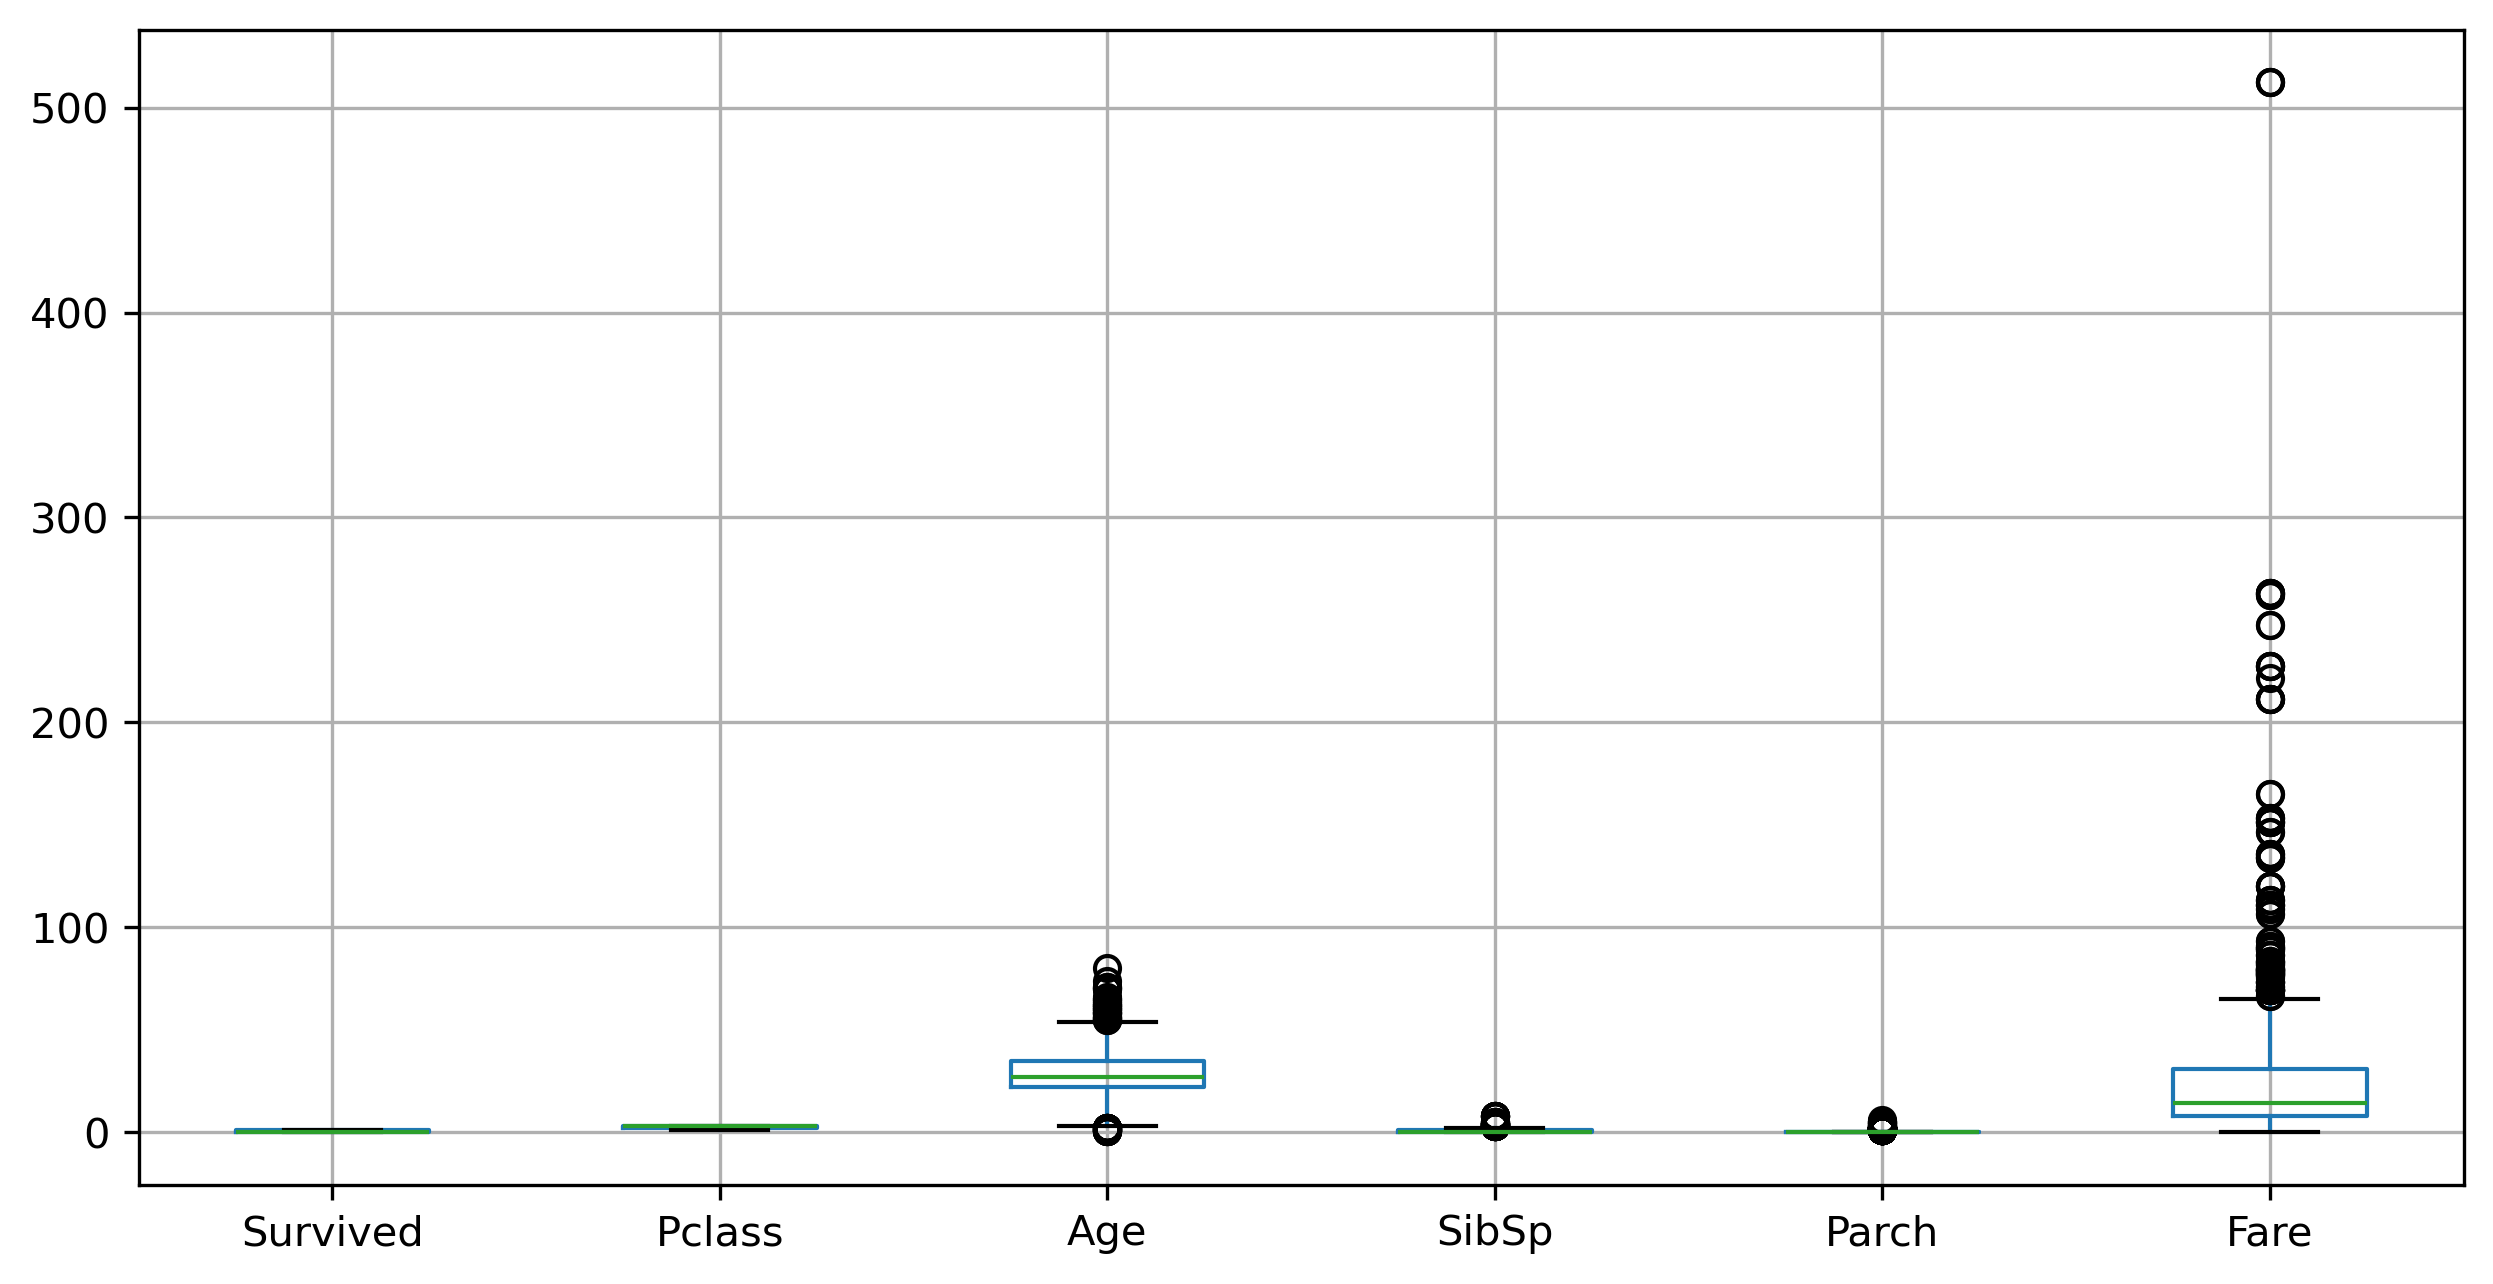

In [401]:
titanic_train_data.boxplot()

<Axes: >

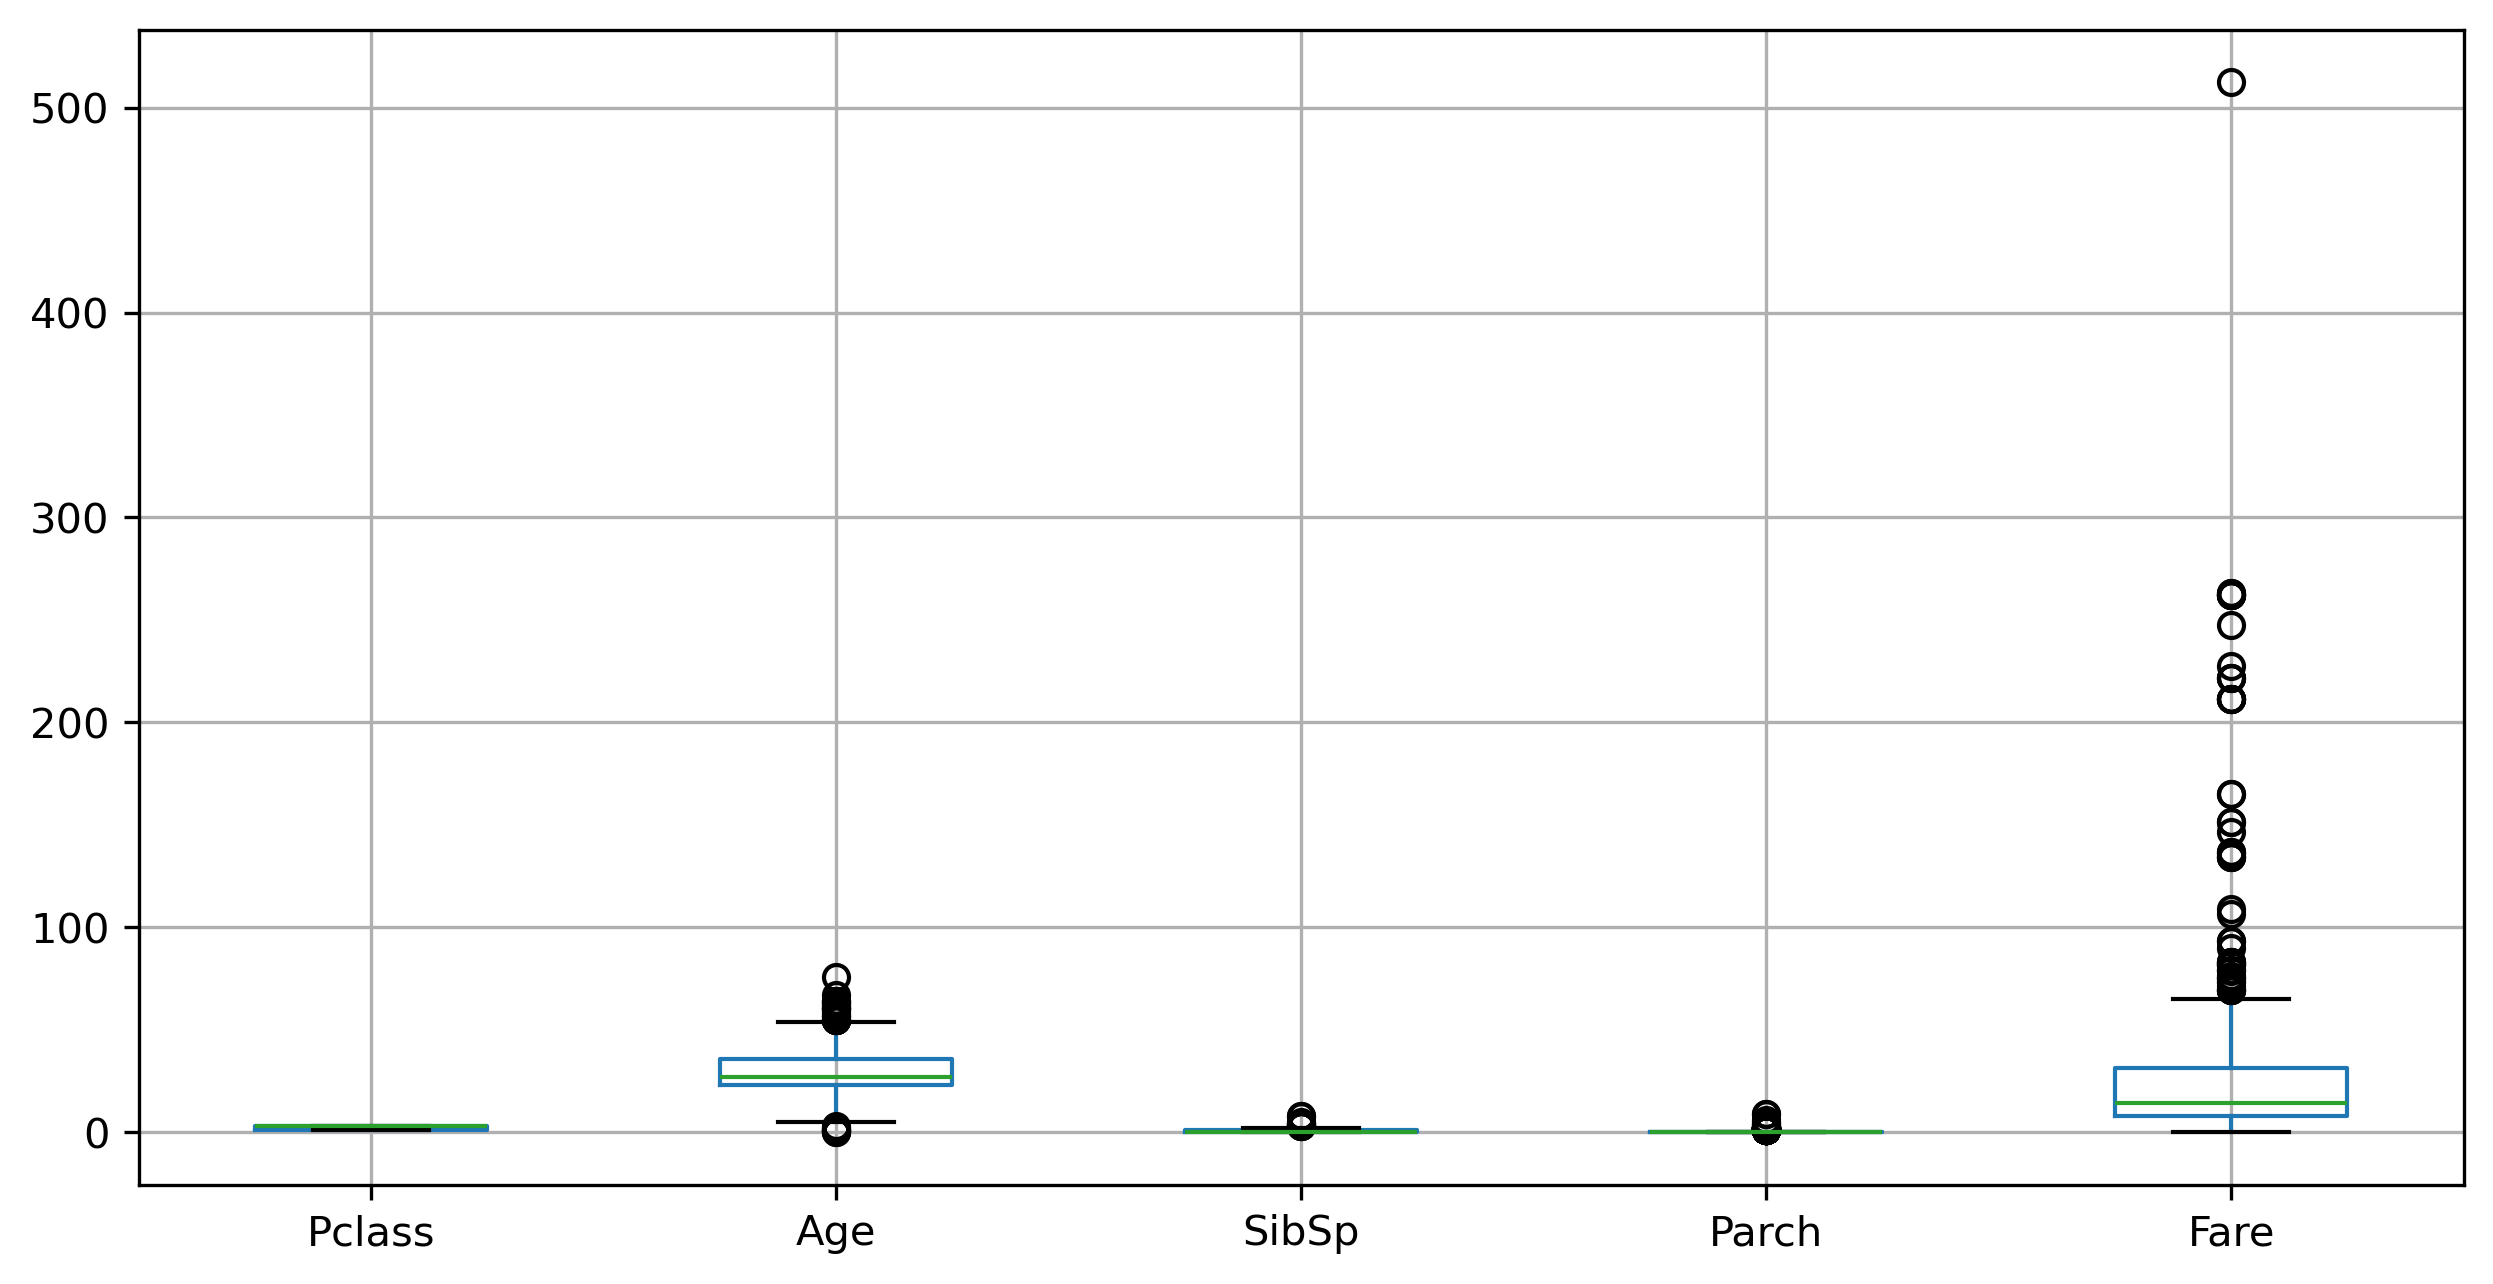

In [402]:
titanic_test_data.boxplot()

In [403]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_train_data[col] = np.where(titanic_train_data[col] > upper, upper, np.where(titanic_train_data[col] < lower, lower,titanic_train_data[col]))

In [404]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_test_data[col] = np.where(titanic_test_data[col] > upper, upper, np.where(titanic_test_data[col] < lower, lower,titanic_test_data[col]))

In [405]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [406]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [407]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [408]:
titanic_test_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [409]:
#temparary we drop these columns for outlier detection
titanic_train_data.drop(columns=['Sex','Embarked']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [410]:
#temparary we drop these columns for outlier detection
titanic_test_data.drop(columns=['Sex','Embarked']).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Axes: >

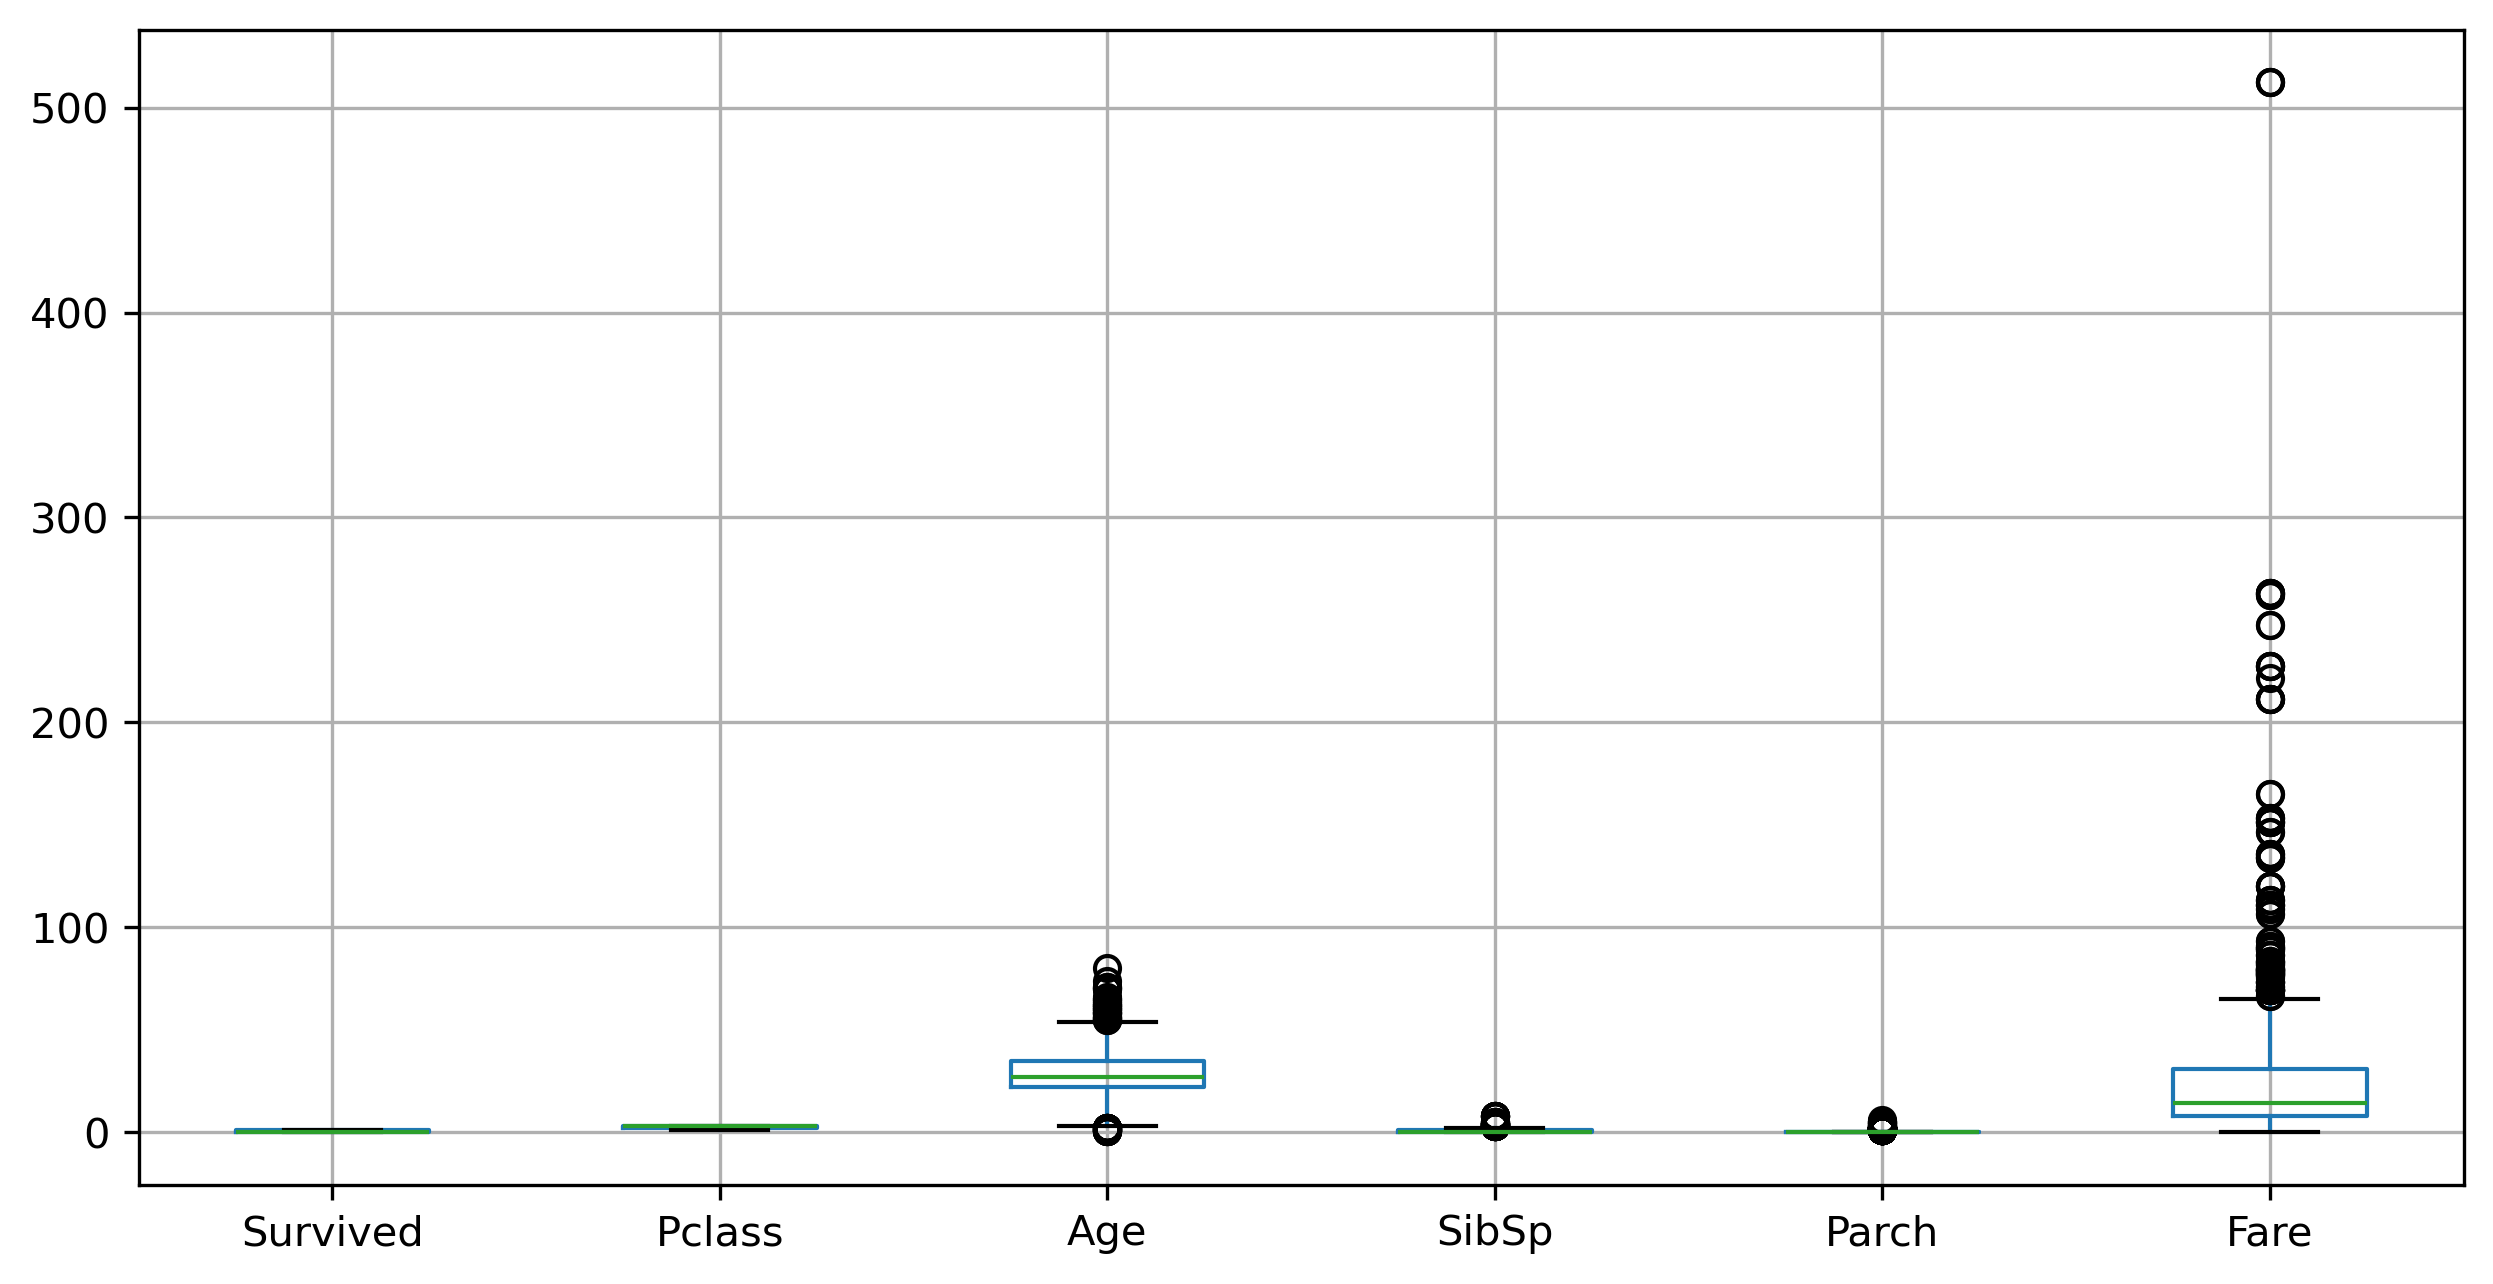

In [411]:
titanic_train_data.boxplot()

<Axes: >

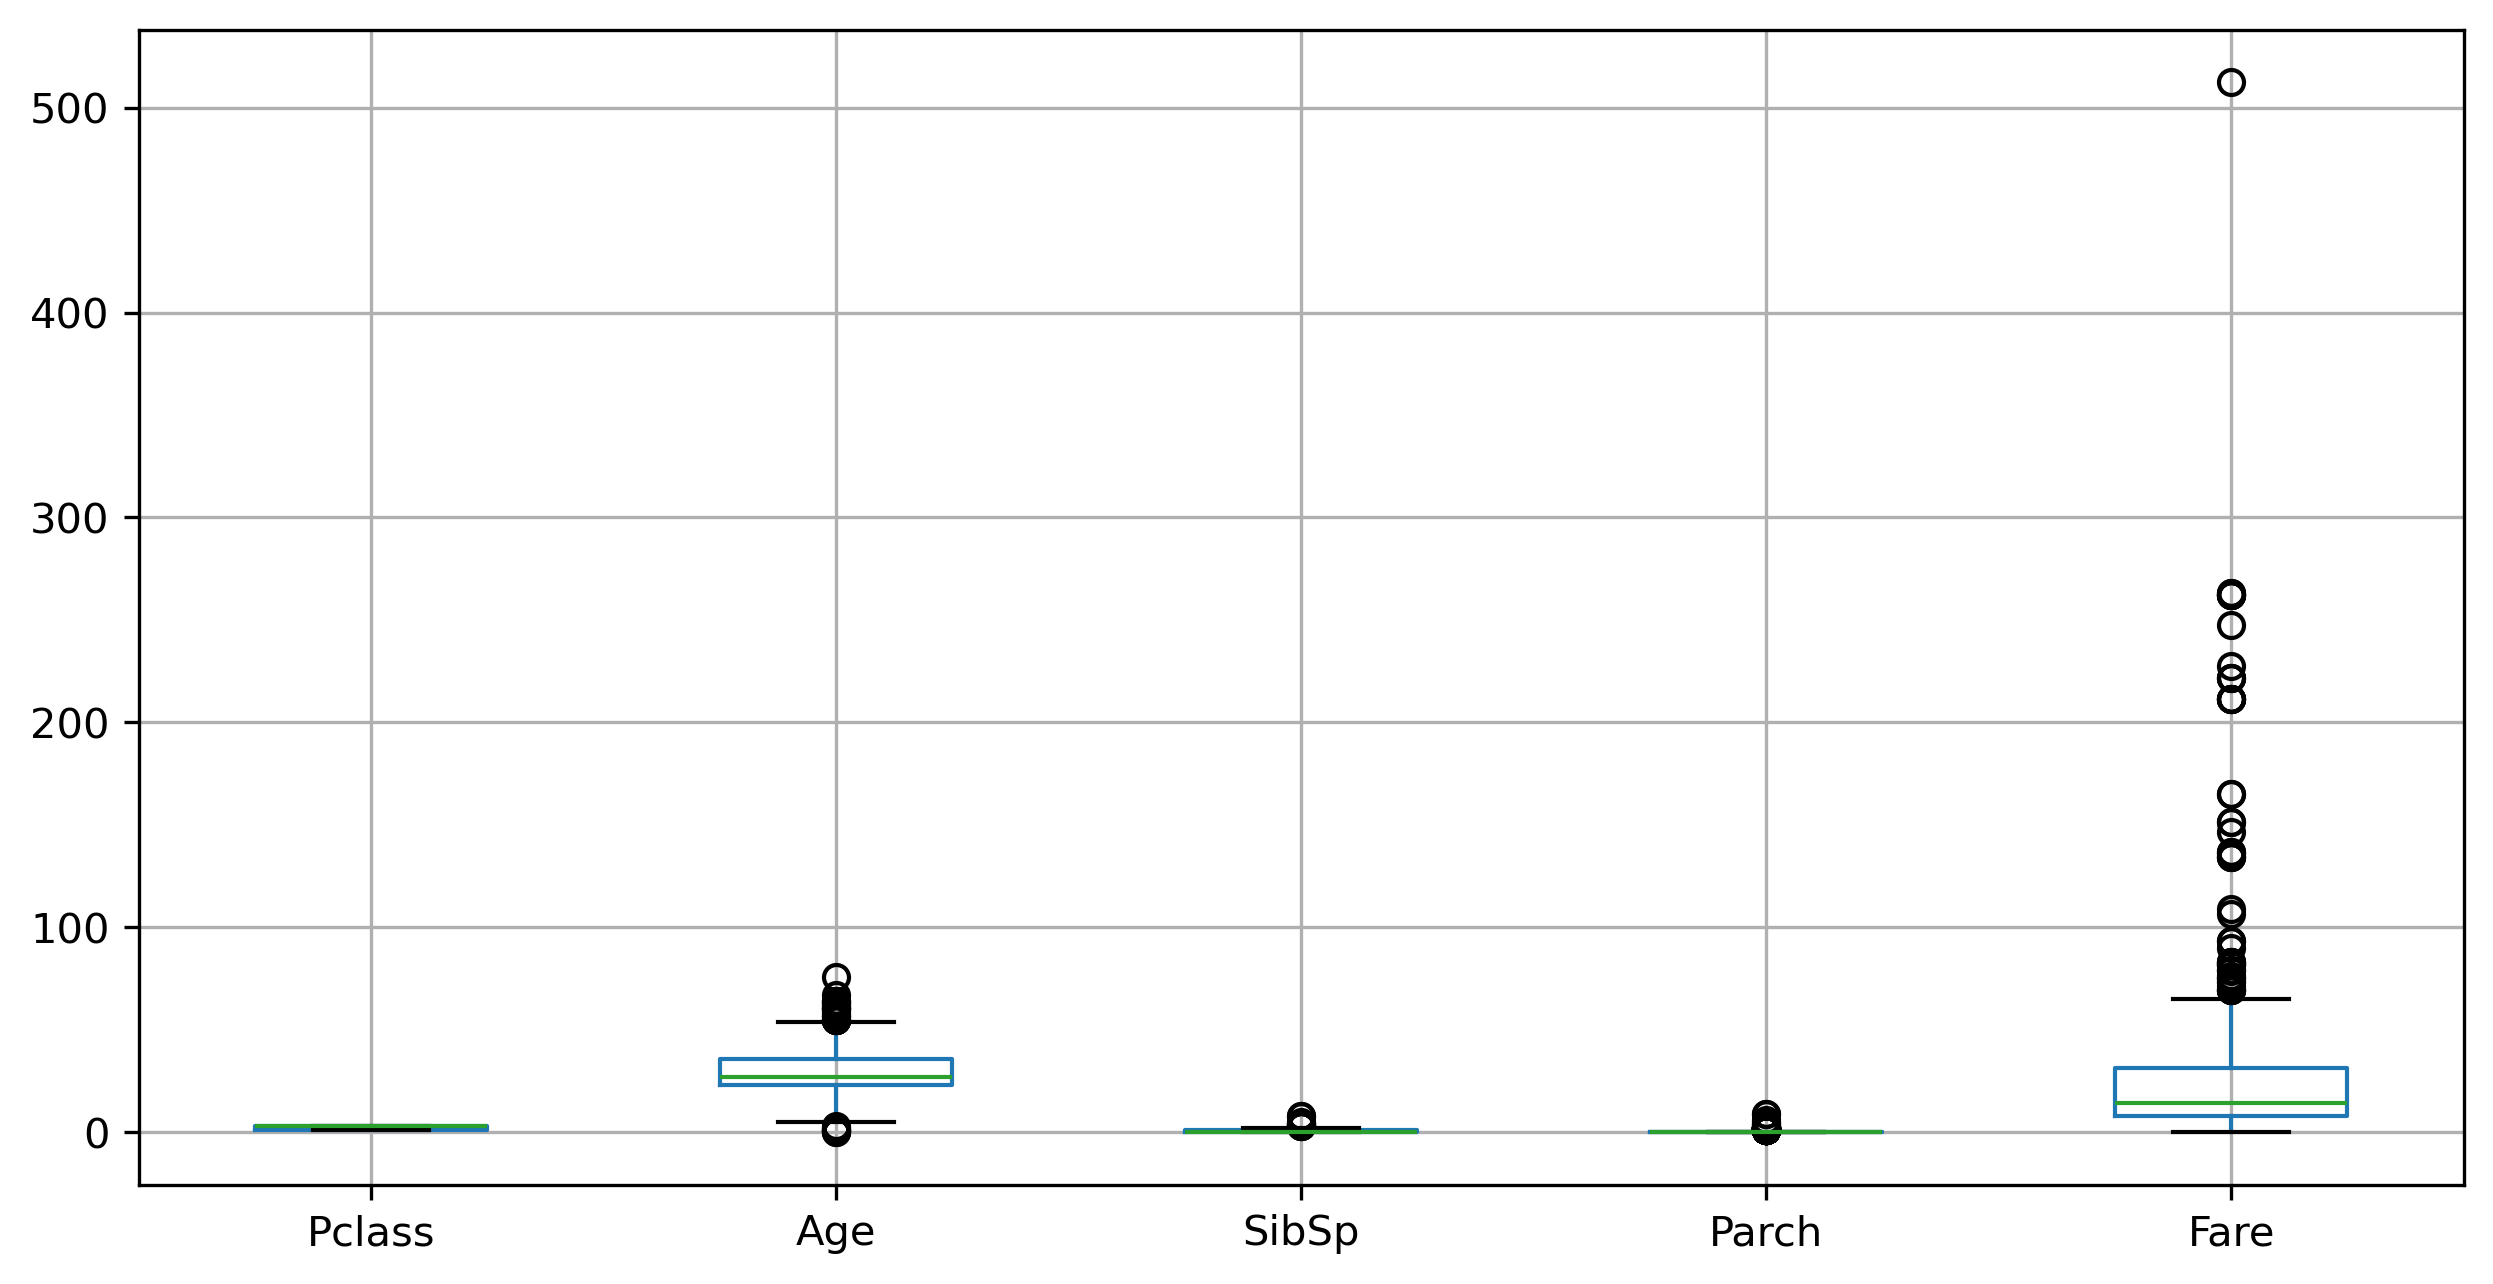

In [412]:
titanic_test_data.boxplot()

In [413]:
#scatter and correlation
titanic_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [414]:
titanic_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


<Axes: xlabel='Pclass', ylabel='Fare'>

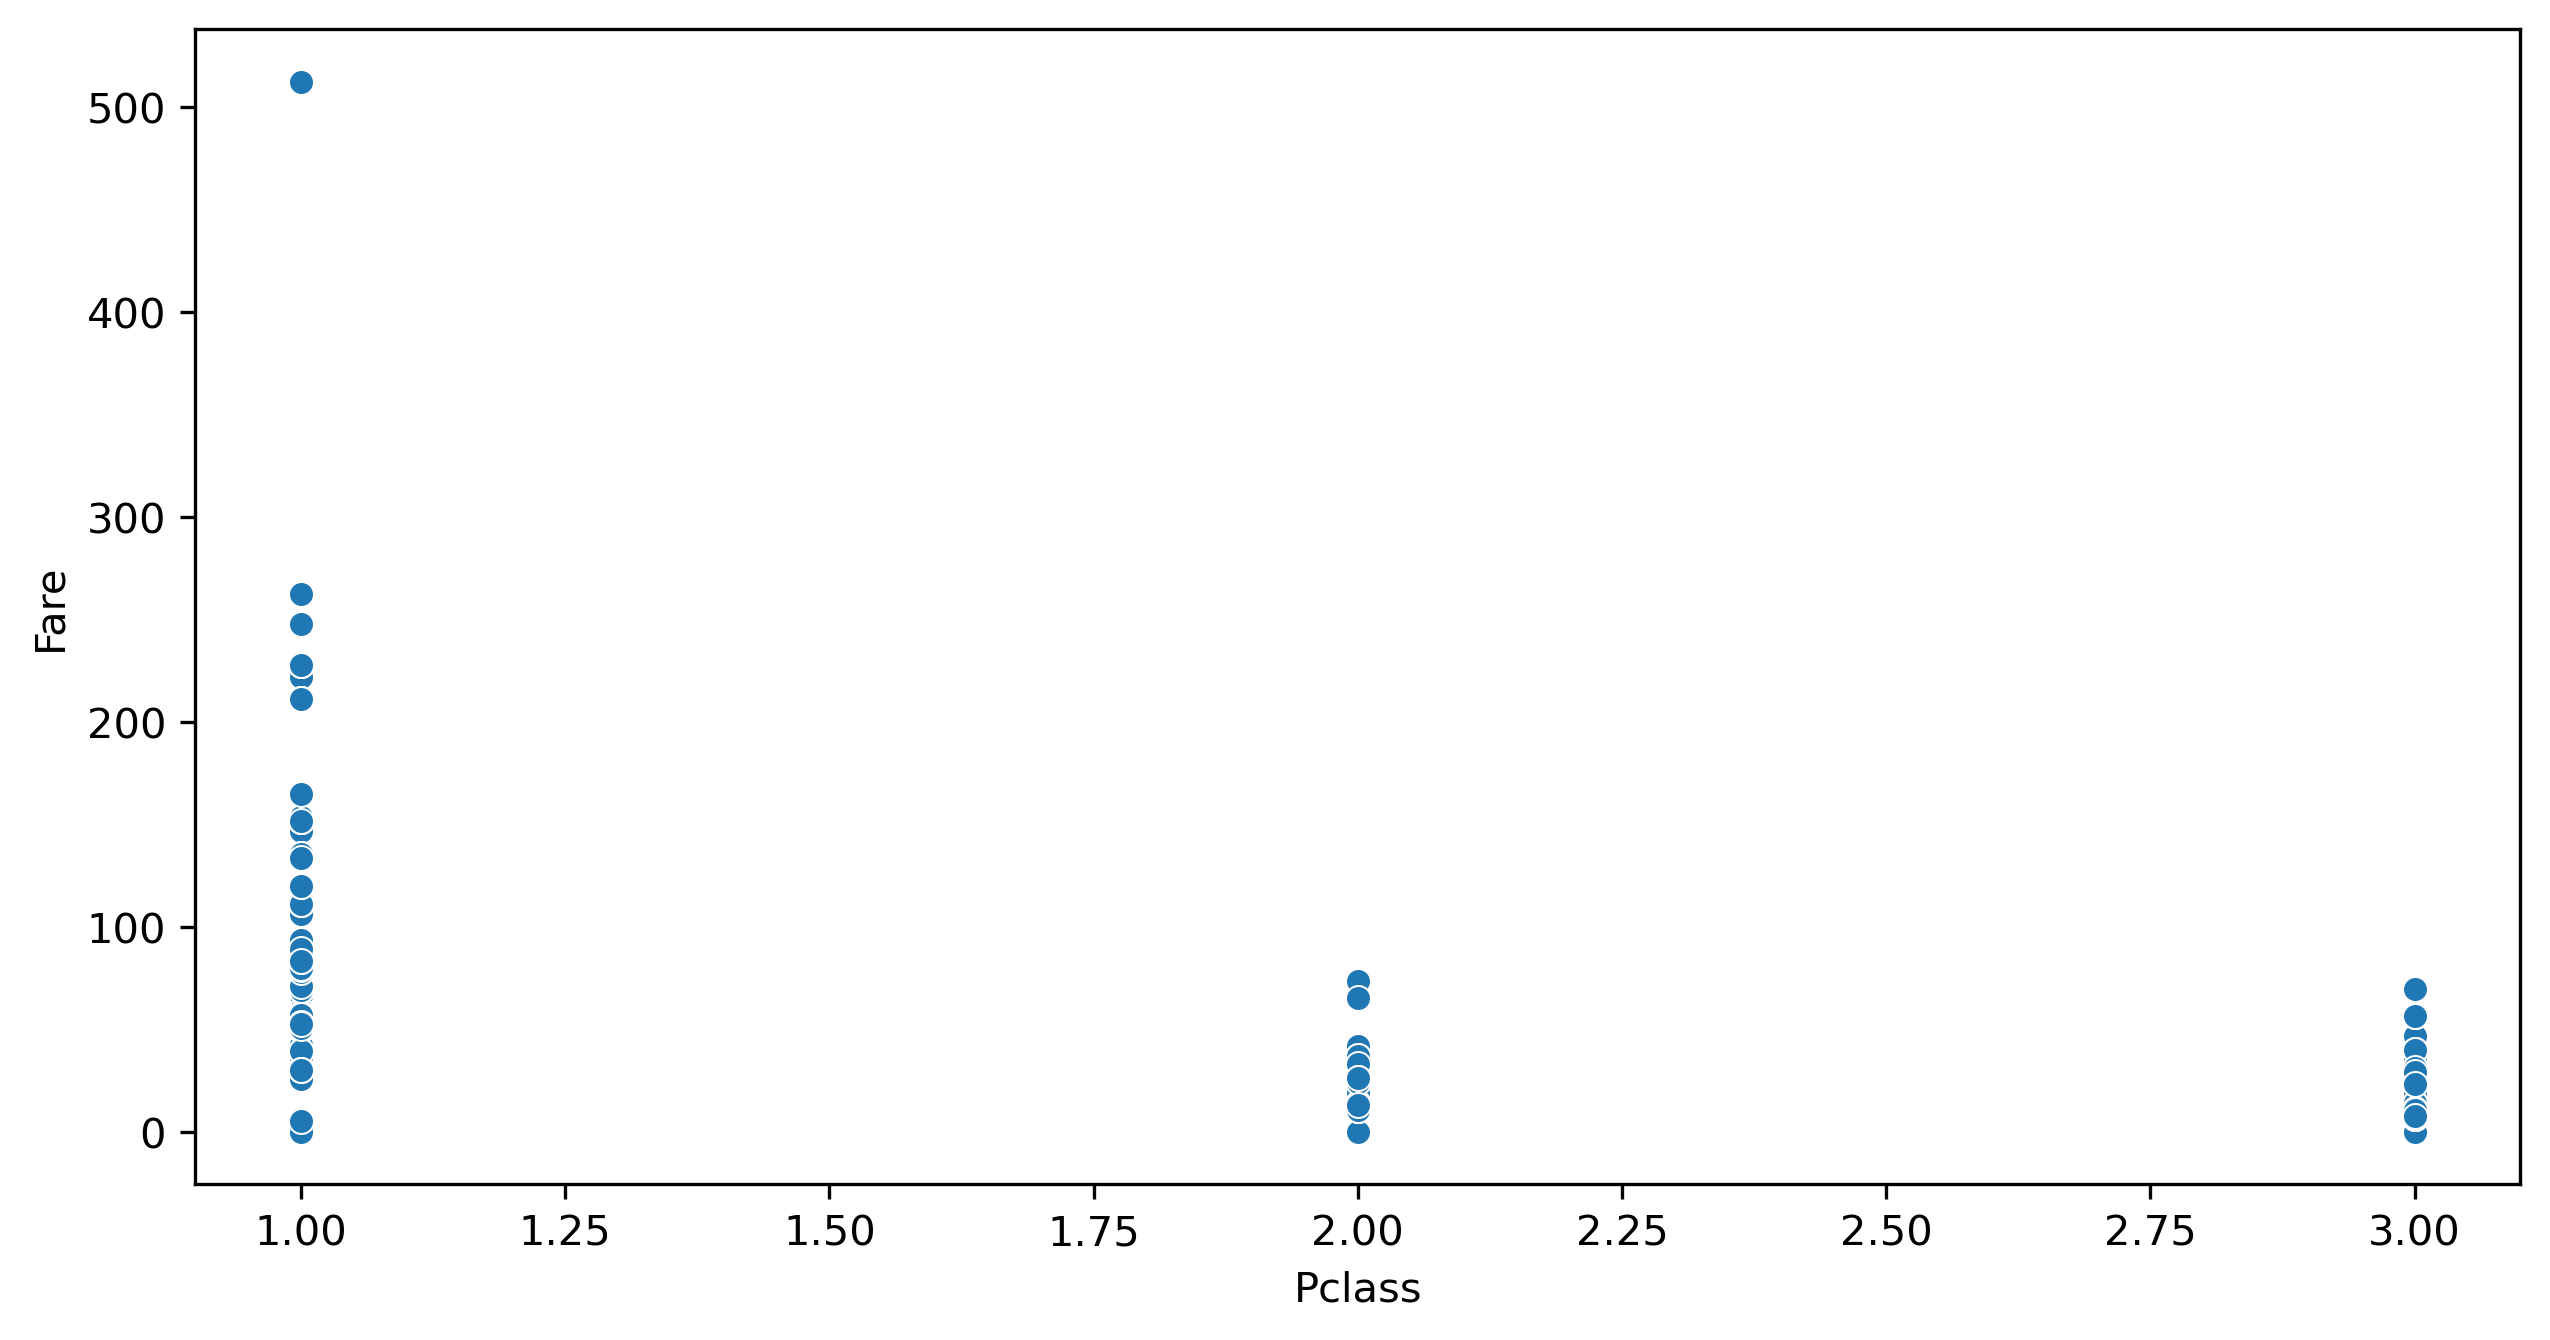

In [415]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

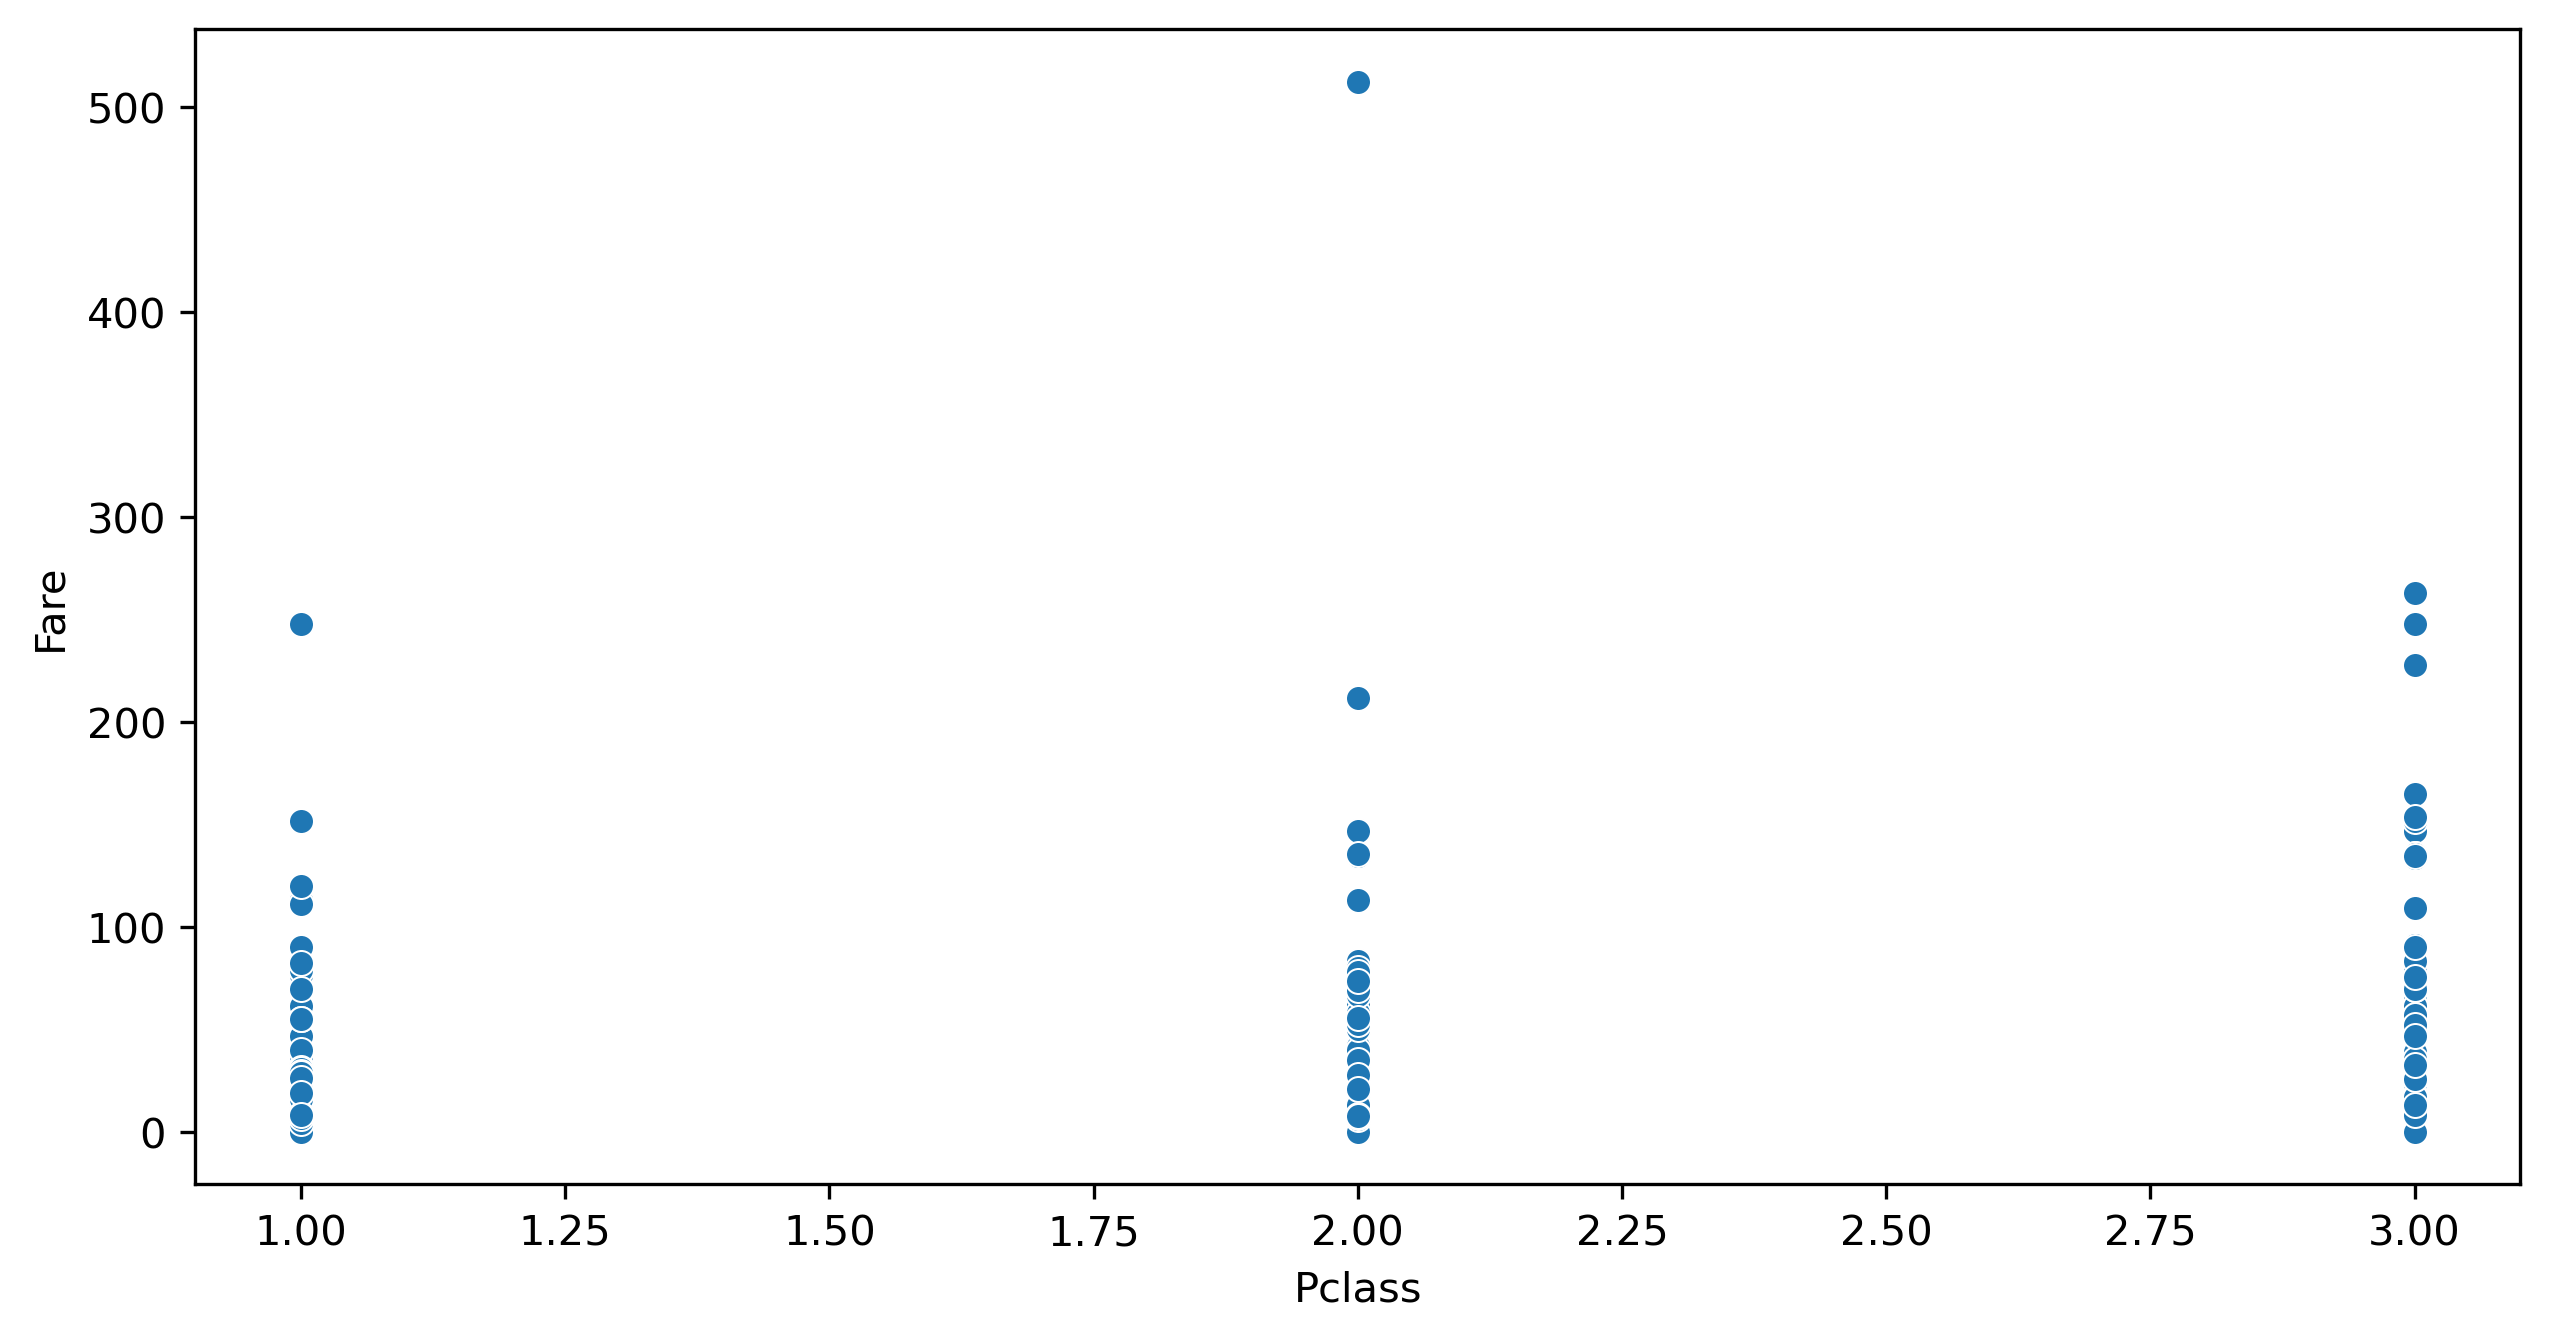

In [416]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

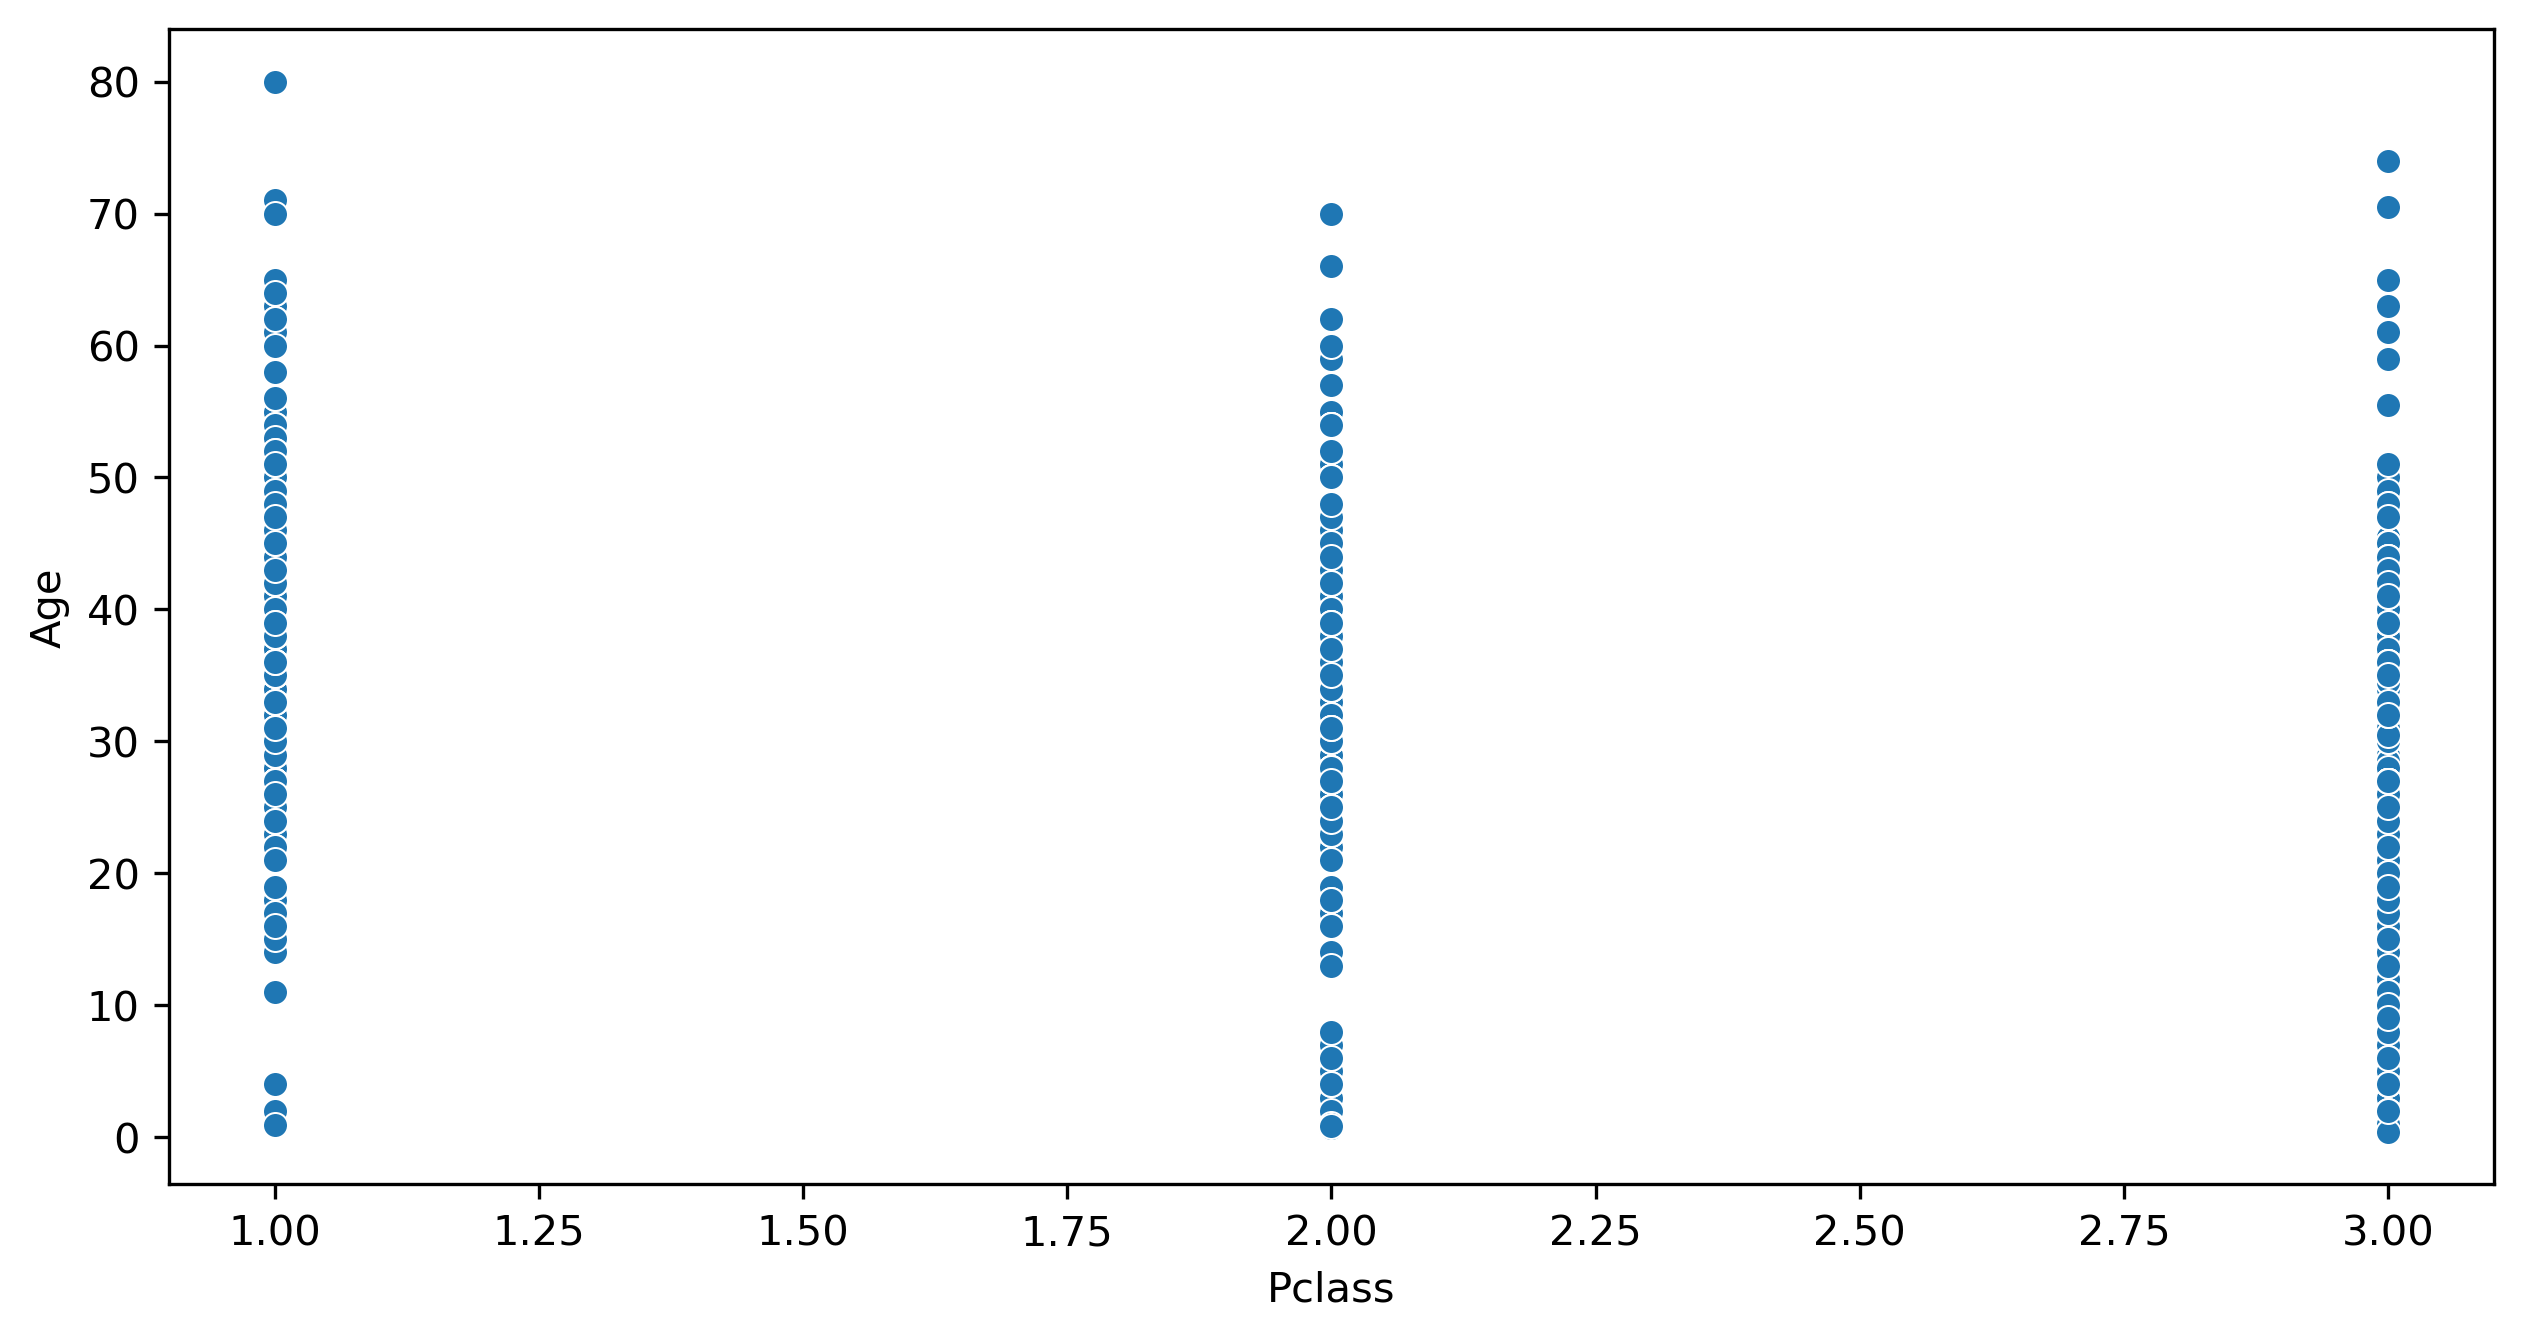

In [417]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

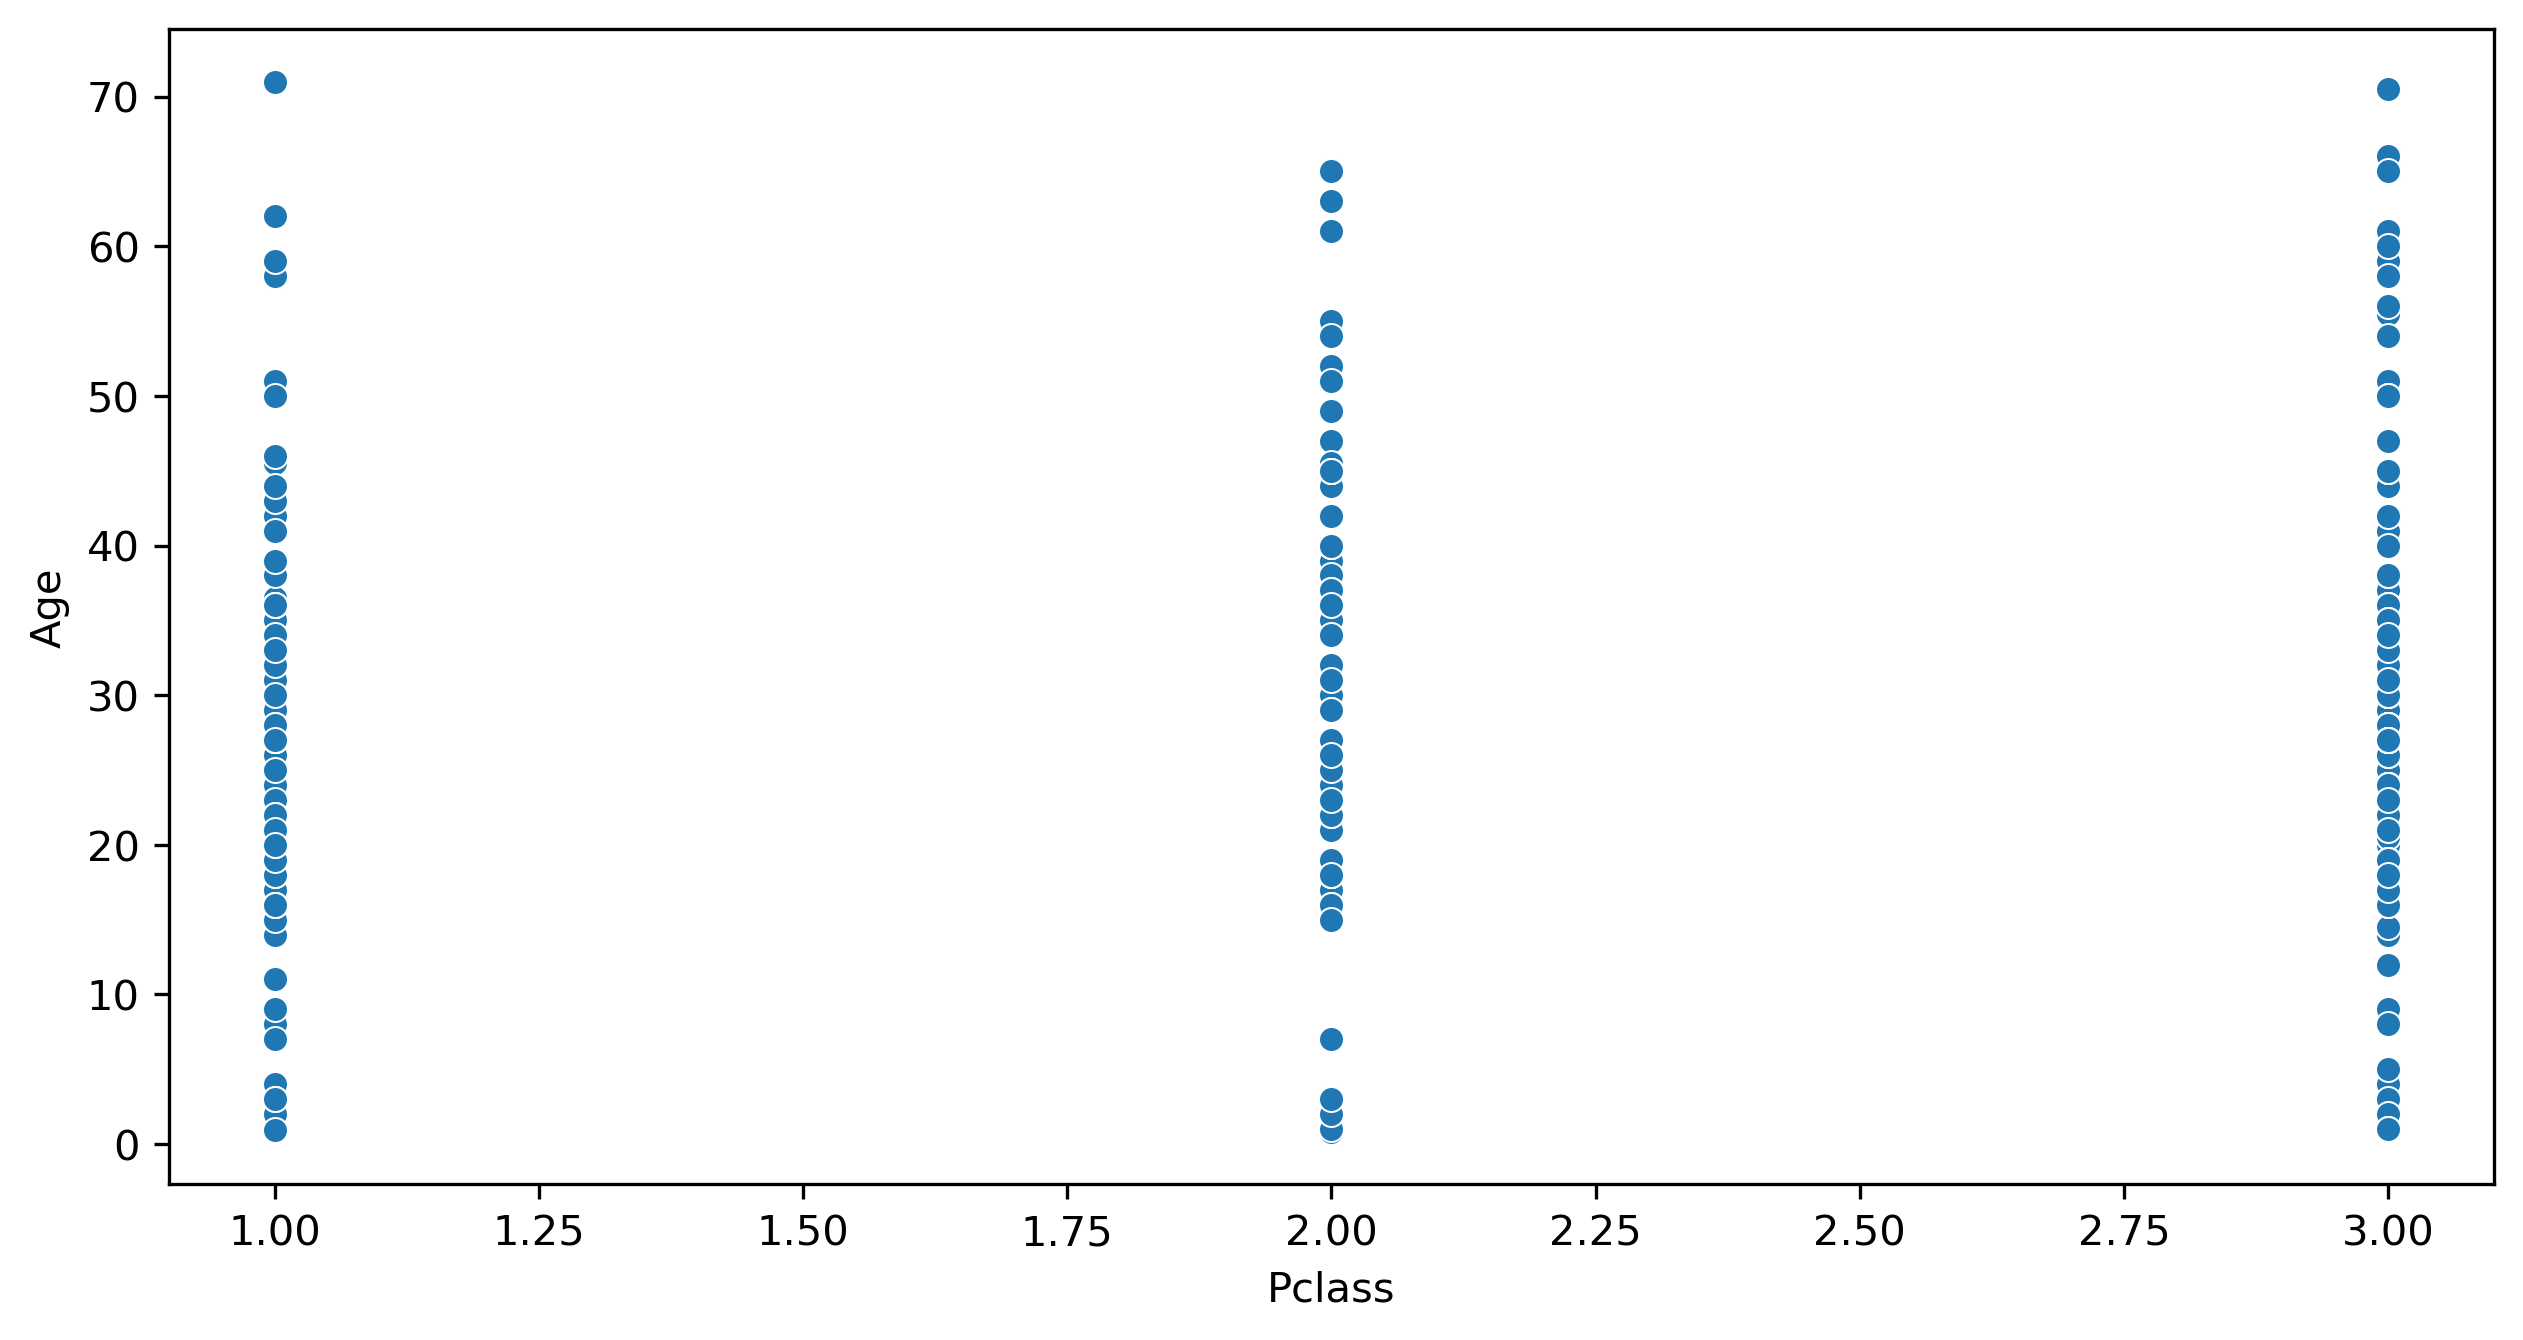

In [418]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Age'])

In [419]:
titanic_train_data.drop(columns=['Parch'], inplace=True)

In [420]:
titanic_test_data.drop(columns=['Parch'], inplace=True)

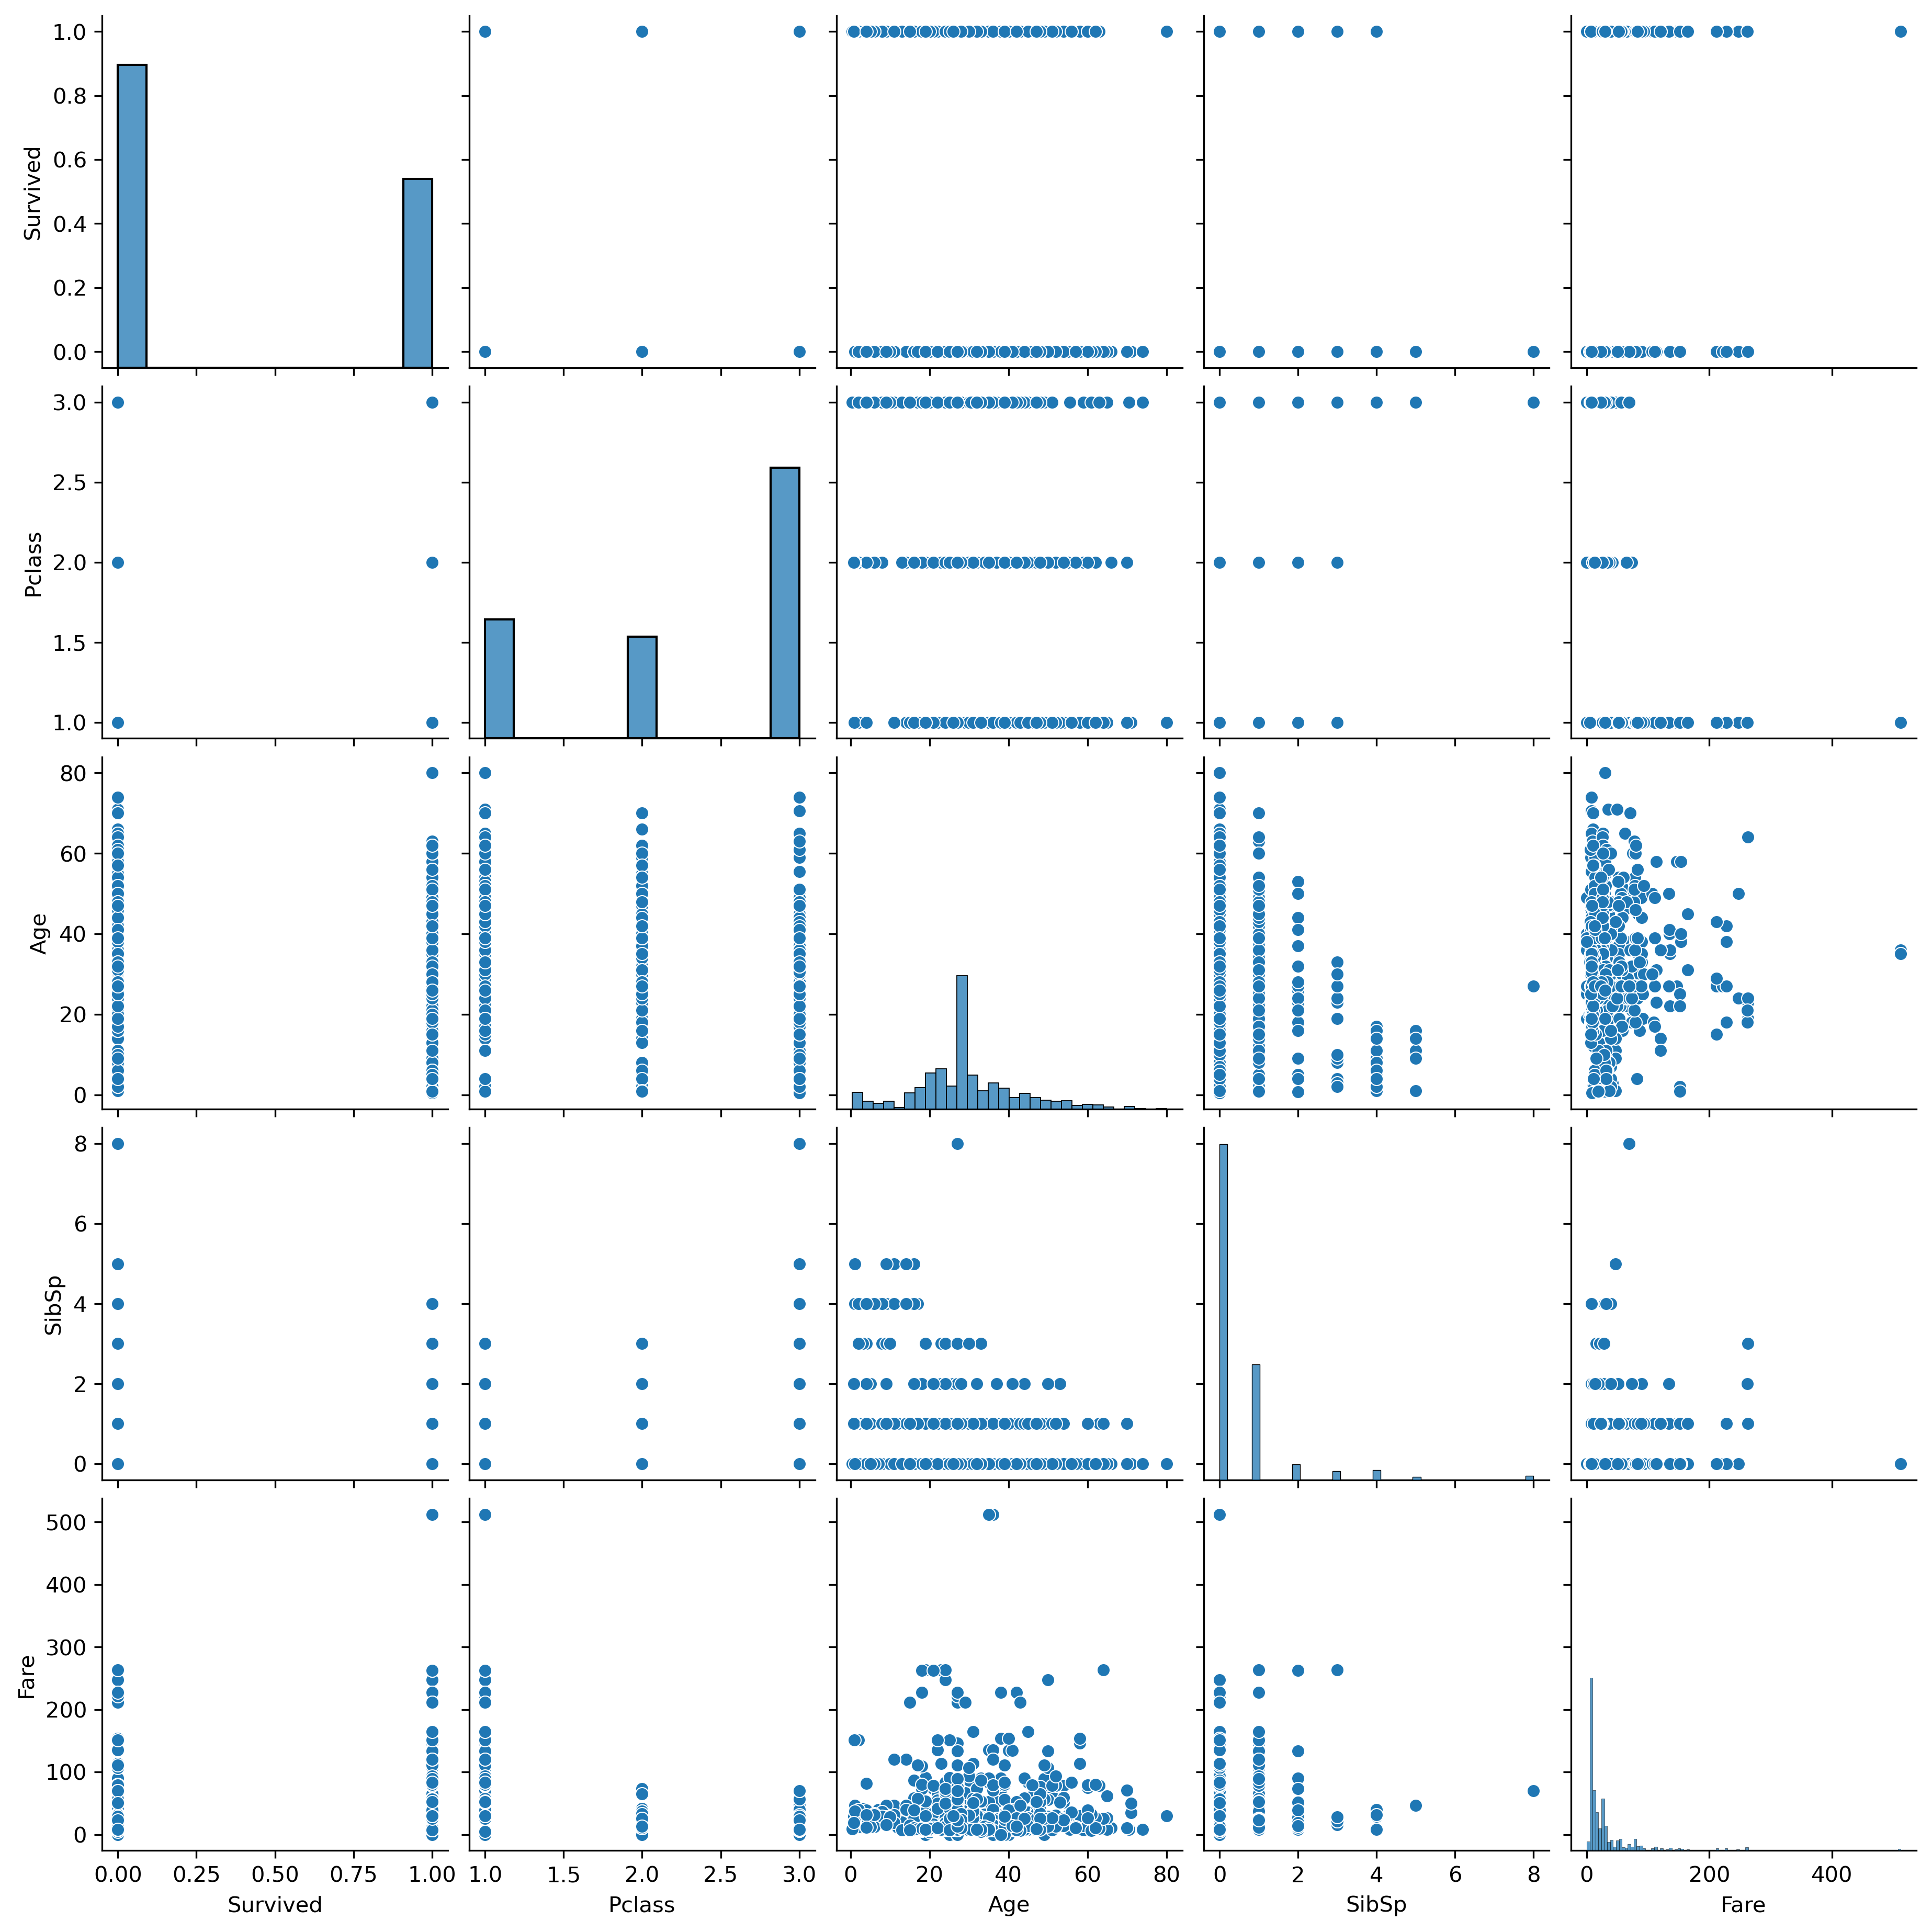

In [421]:
sns.pairplot(titanic_train_data)

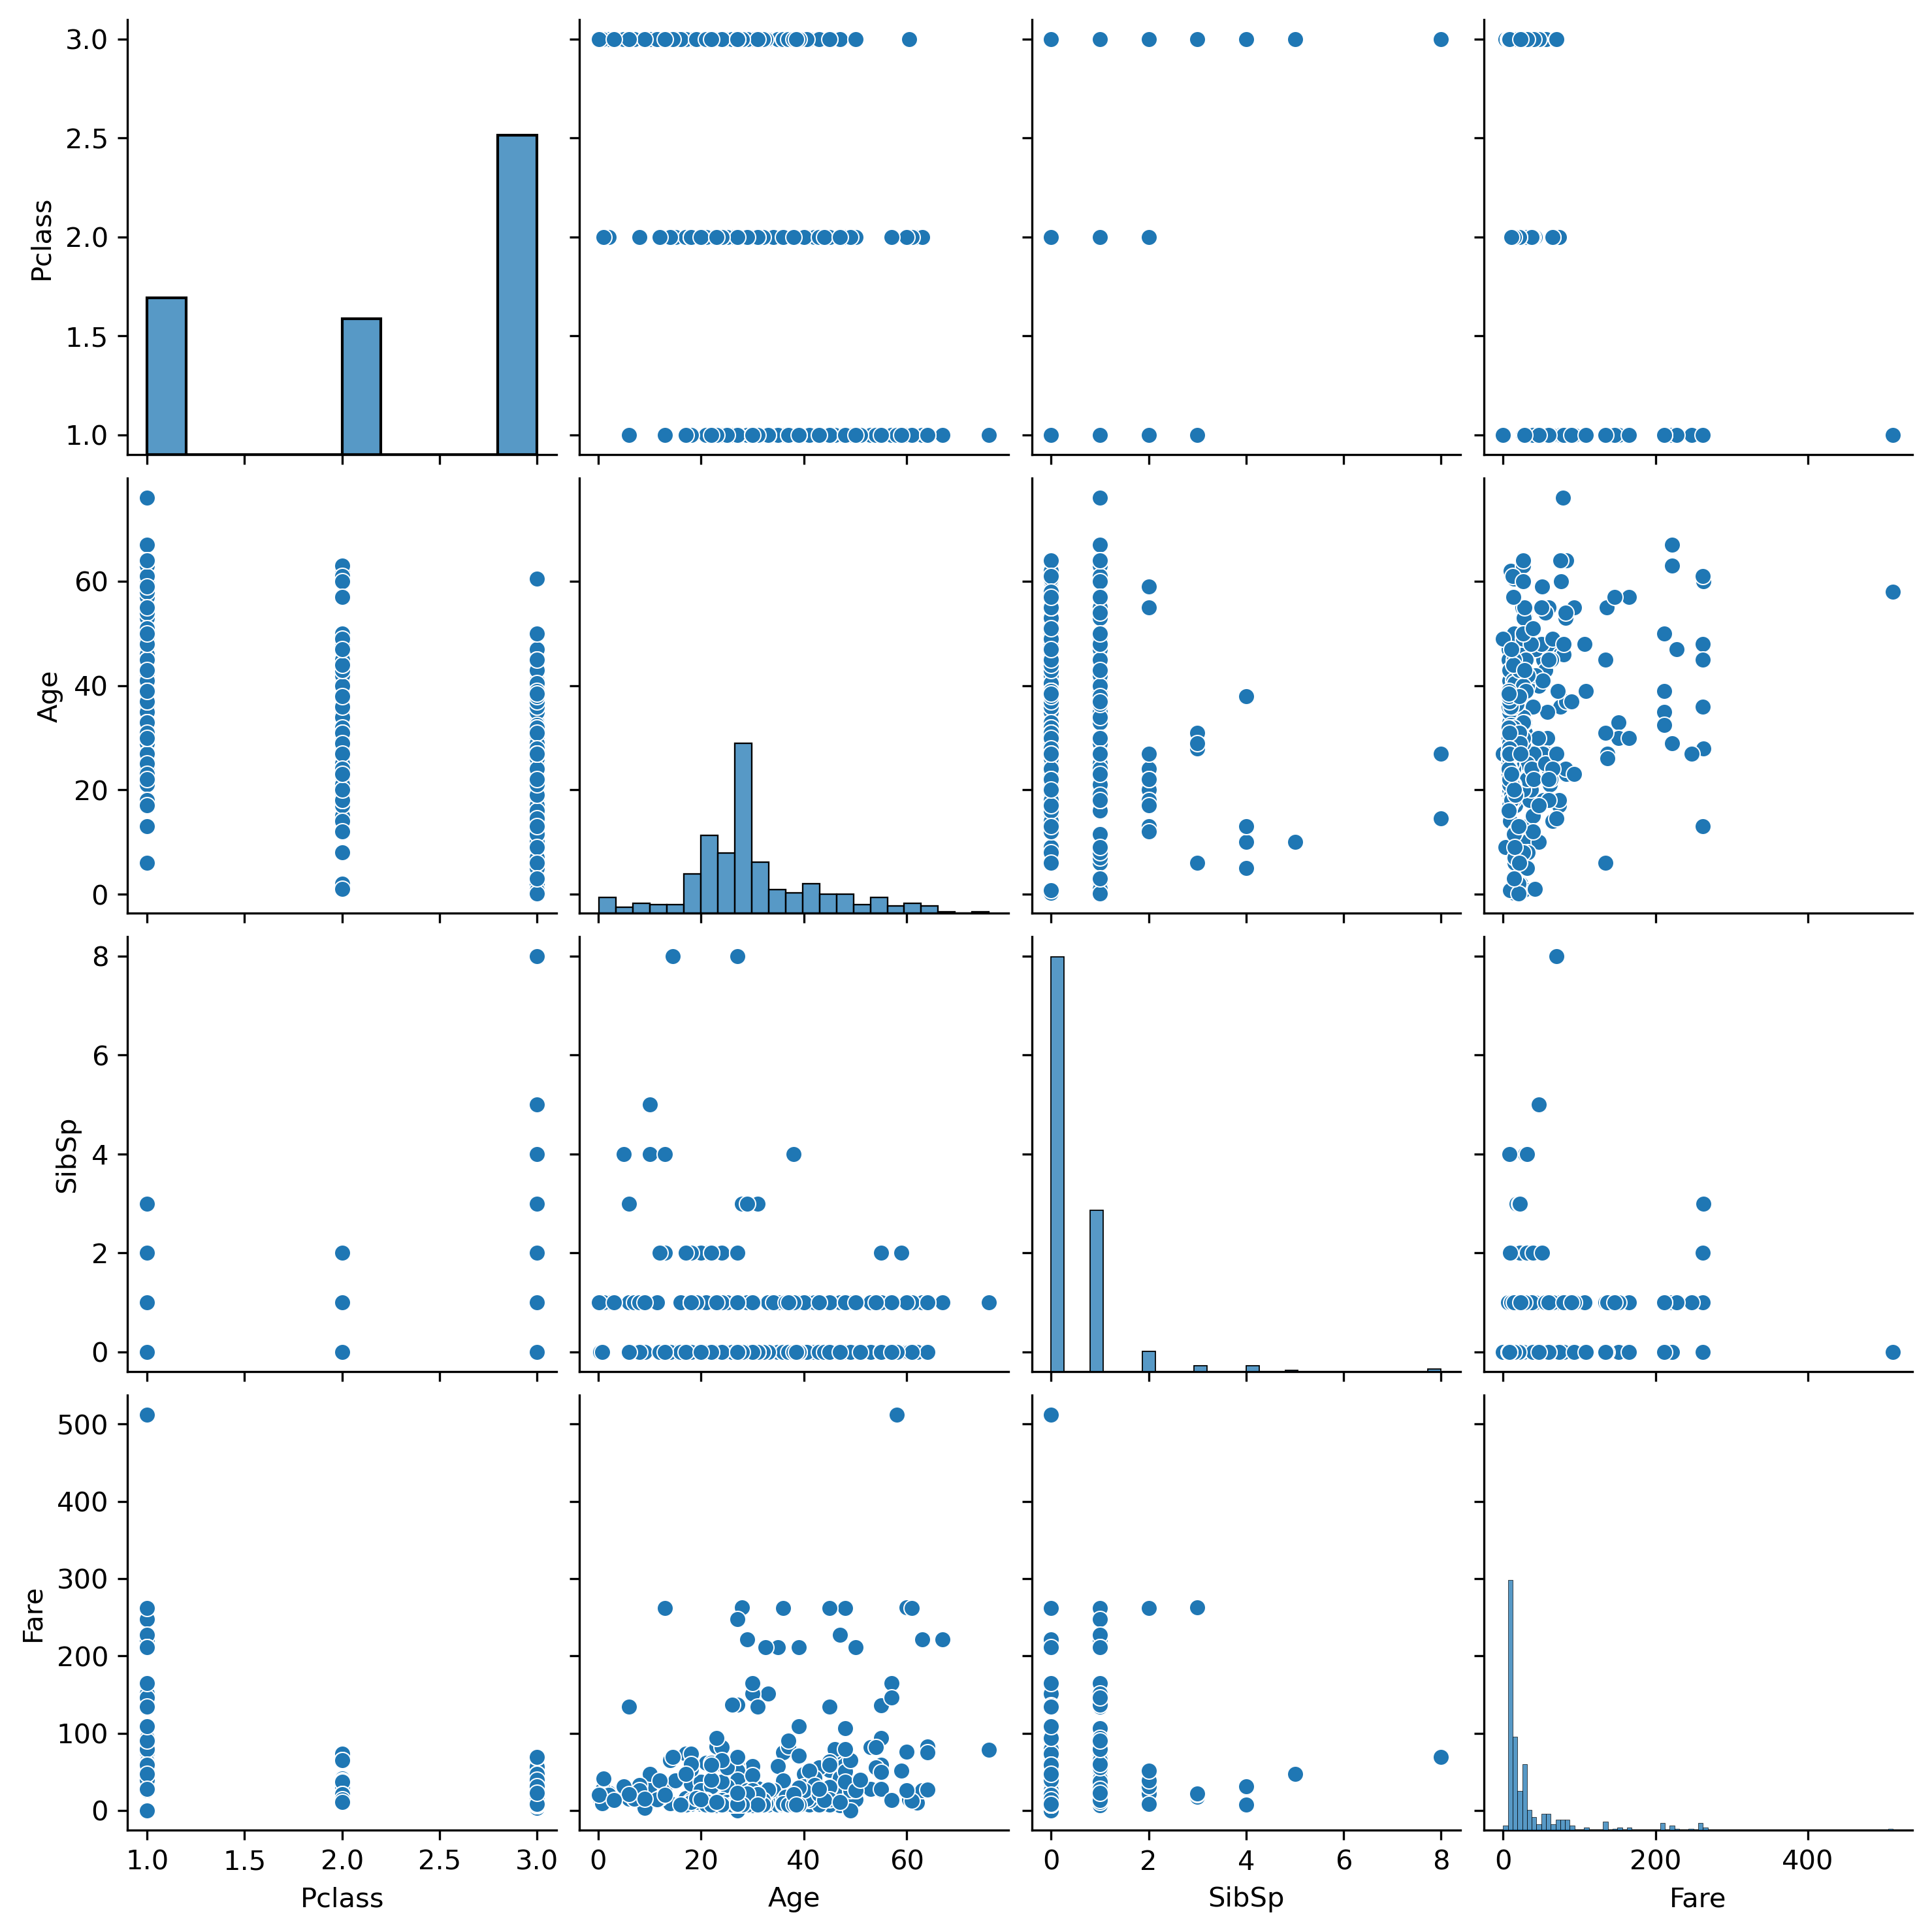

In [422]:
sns.pairplot(titanic_test_data)

In [423]:
#Correlation coefficient
import warnings
warnings.filterwarnings('ignore')
titanic_train_data.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.061956,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.344489,0.083081,-0.549500
Age,-0.061956,-0.344489,1.000000,-0.233396,0.099571
SibSp,-0.035322,0.083081,-0.233396,1.000000,0.159651
Fare,0.257307,-0.549500,0.099571,0.159651,1.000000


In [424]:
import warnings
warnings.filterwarnings('ignore')
titanic_test_data.corr(numeric_only=True)

,Pclass,Age,SibSp,Fare
Pclass,1.000000,-0.467853,0.001087,-0.577313
Age,-0.467853,1.000000,-0.071197,0.342357
SibSp,0.001087,-0.071197,1.000000,0.171912
Fare,-0.577313,0.342357,0.171912,1.000000


<Axes: >

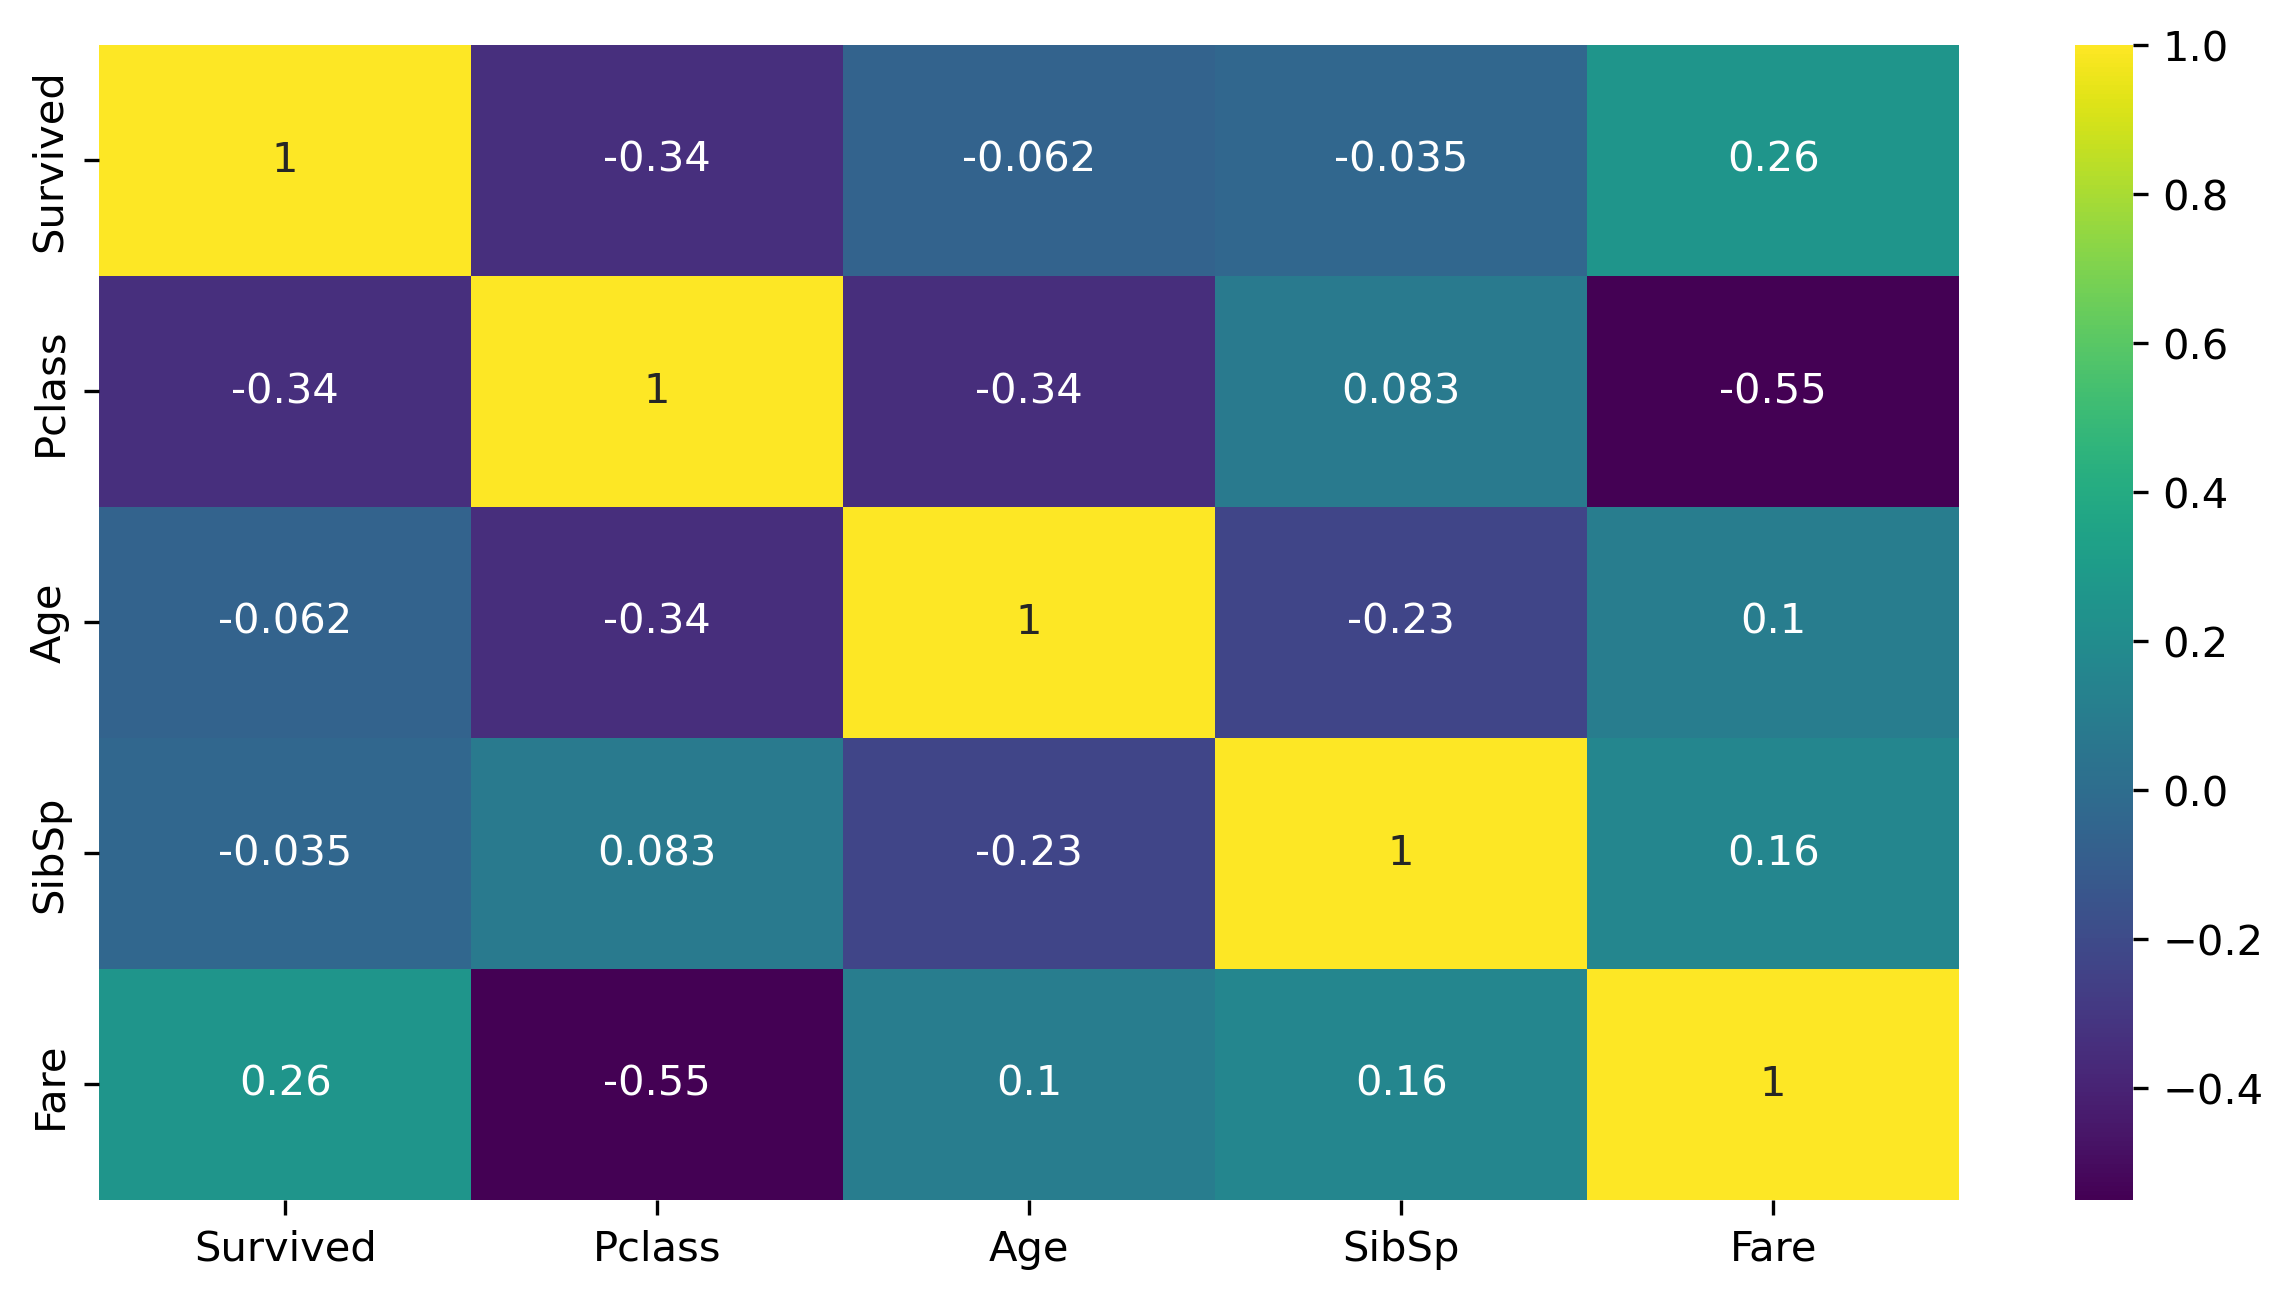

In [425]:
sns.heatmap(titanic_train_data.corr(numeric_only=True), annot=True, cmap='viridis')

<Axes: >

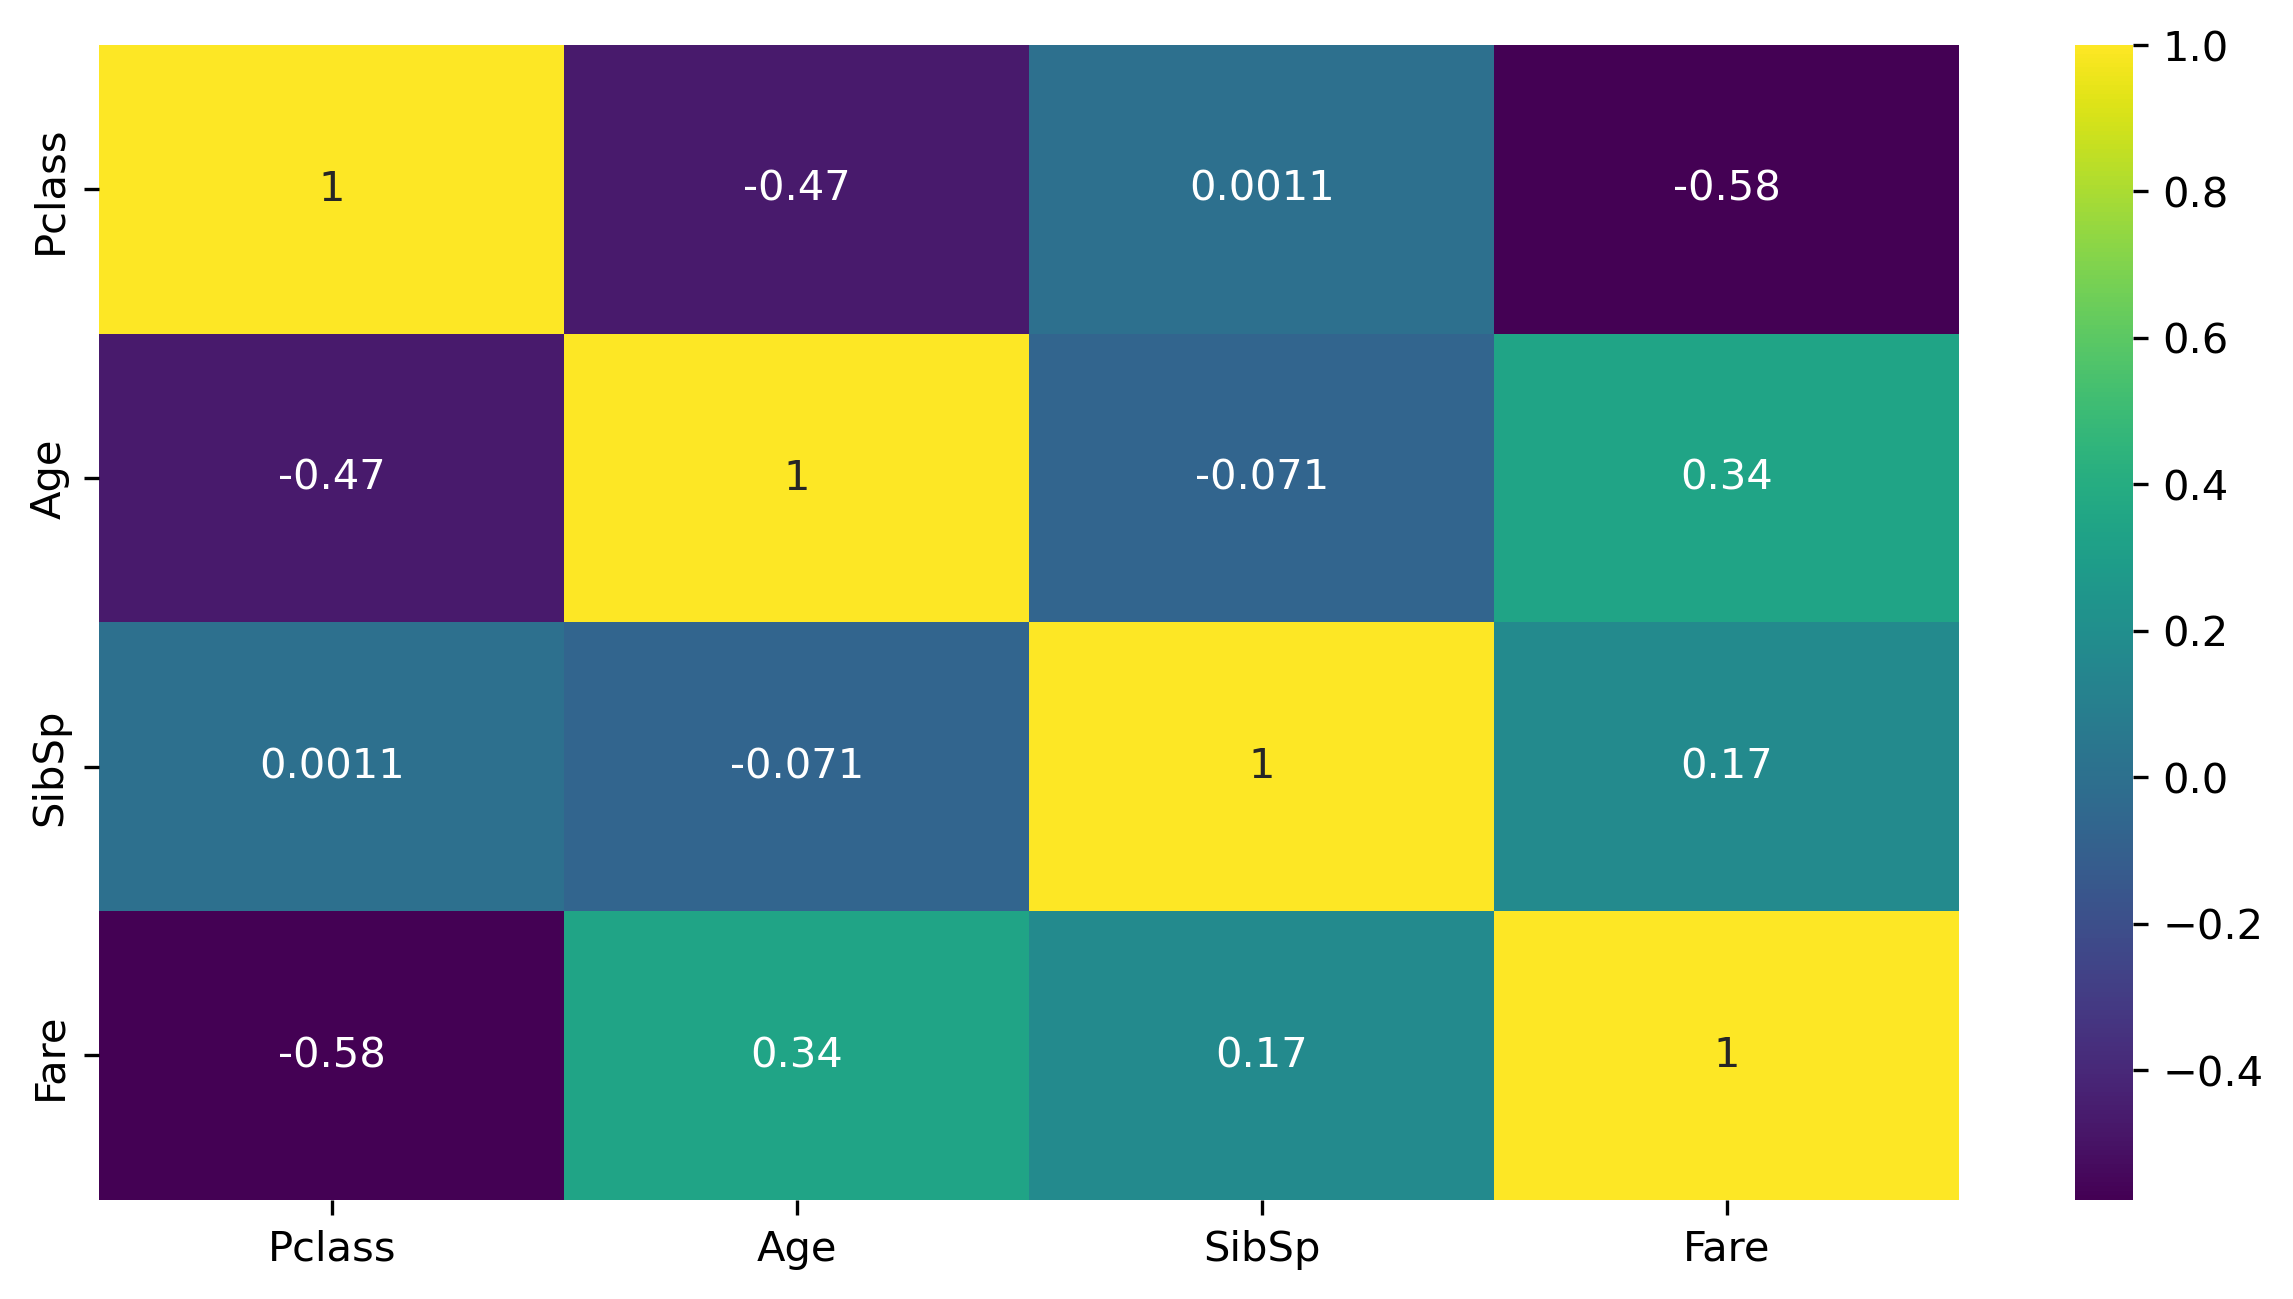

In [426]:
sns.heatmap(titanic_test_data.corr(numeric_only=True), annot=True, cmap='viridis')

In [427]:
titanic_train_data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,27.0,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [428]:
titanic_test_data

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,27.0,0,8.0500,S
414,1,female,39.0,0,108.9000,C
415,3,male,38.5,0,7.2500,S
416,3,male,27.0,0,8.0500,S


In [429]:
#Data preprocessing
##Encoding using pandas dummy function.
titanic_train_data=pd.get_dummies(data=titanic_train_data)
#titanic_train_data=pd.get_dummies(data=titanic_train_data, columns= ['Sex','Embarked'])
titanic_train_data

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,False,True,False,False,True
1,1,1,38.0,1,71.2833,True,False,True,False,False
2,1,3,26.0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,53.1000,True,False,False,False,True
4,0,3,35.0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,30.0000,True,False,False,False,True
888,0,3,27.0,1,23.4500,True,False,False,False,True
889,1,1,26.0,0,30.0000,False,True,True,False,False


In [430]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [431]:
#3. Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.
#Define x and y
titanic_train_data.head(4)

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,False,True,False,False,True
1,1,1,38.0,1,71.2833,True,False,True,False,False
2,1,3,26.0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,53.1000,True,False,False,False,True


In [432]:
x =titanic_train_data .iloc[:,1:]
x

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,False,True,False,False,True
1,1,38.0,1,71.2833,True,False,True,False,False
2,3,26.0,0,7.9250,True,False,False,False,True
3,1,35.0,1,53.1000,True,False,False,False,True
4,3,35.0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,13.0000,False,True,False,False,True
887,1,19.0,0,30.0000,True,False,False,False,True
888,3,27.0,1,23.4500,True,False,False,False,True
889,1,26.0,0,30.0000,False,True,True,False,False


In [433]:
y = titanic_train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [434]:
#Split the data.
from sklearn.model_selection import train_test_split
train_test_split(x,y,train_size=0.8)

[     Pclass   Age  SibSp     Fare  Sex_female  Sex_male  Embarked_C  \
 532       3  17.0      1   7.2292       False      True        True   
 348       3   3.0      1  15.9000       False      True       False   
 333       3  16.0      2  18.0000       False      True       False   
 725       3  20.0      0   8.6625       False      True       False   
 460       1  48.0      0  26.5500       False      True       False   
 ..      ...   ...    ...      ...         ...       ...         ...   
 76        3  27.0      0   7.8958       False      True       False   
 670       2  40.0      1  39.0000        True     False       False   
 24        3   8.0      3  21.0750        True     False       False   
 761       3  41.0      0   7.1250       False      True       False   
 607       1  27.0      0  30.5000       False      True       False   
 
      Embarked_Q  Embarked_S  
 532       False       False  
 348       False        True  
 333       False        True  
 725      

In [435]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [436]:
from sklearn.linear_model import LogisticRegression

In [437]:
lg = LogisticRegression() 
lg.fit(xtrain,ytrain) 

LogisticRegression()

In [438]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [439]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [440]:
len(ypred)

179

In [441]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score,roc_curve

In [442]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[88, 17],
       [19, 55]], dtype=int64)

<Axes: >

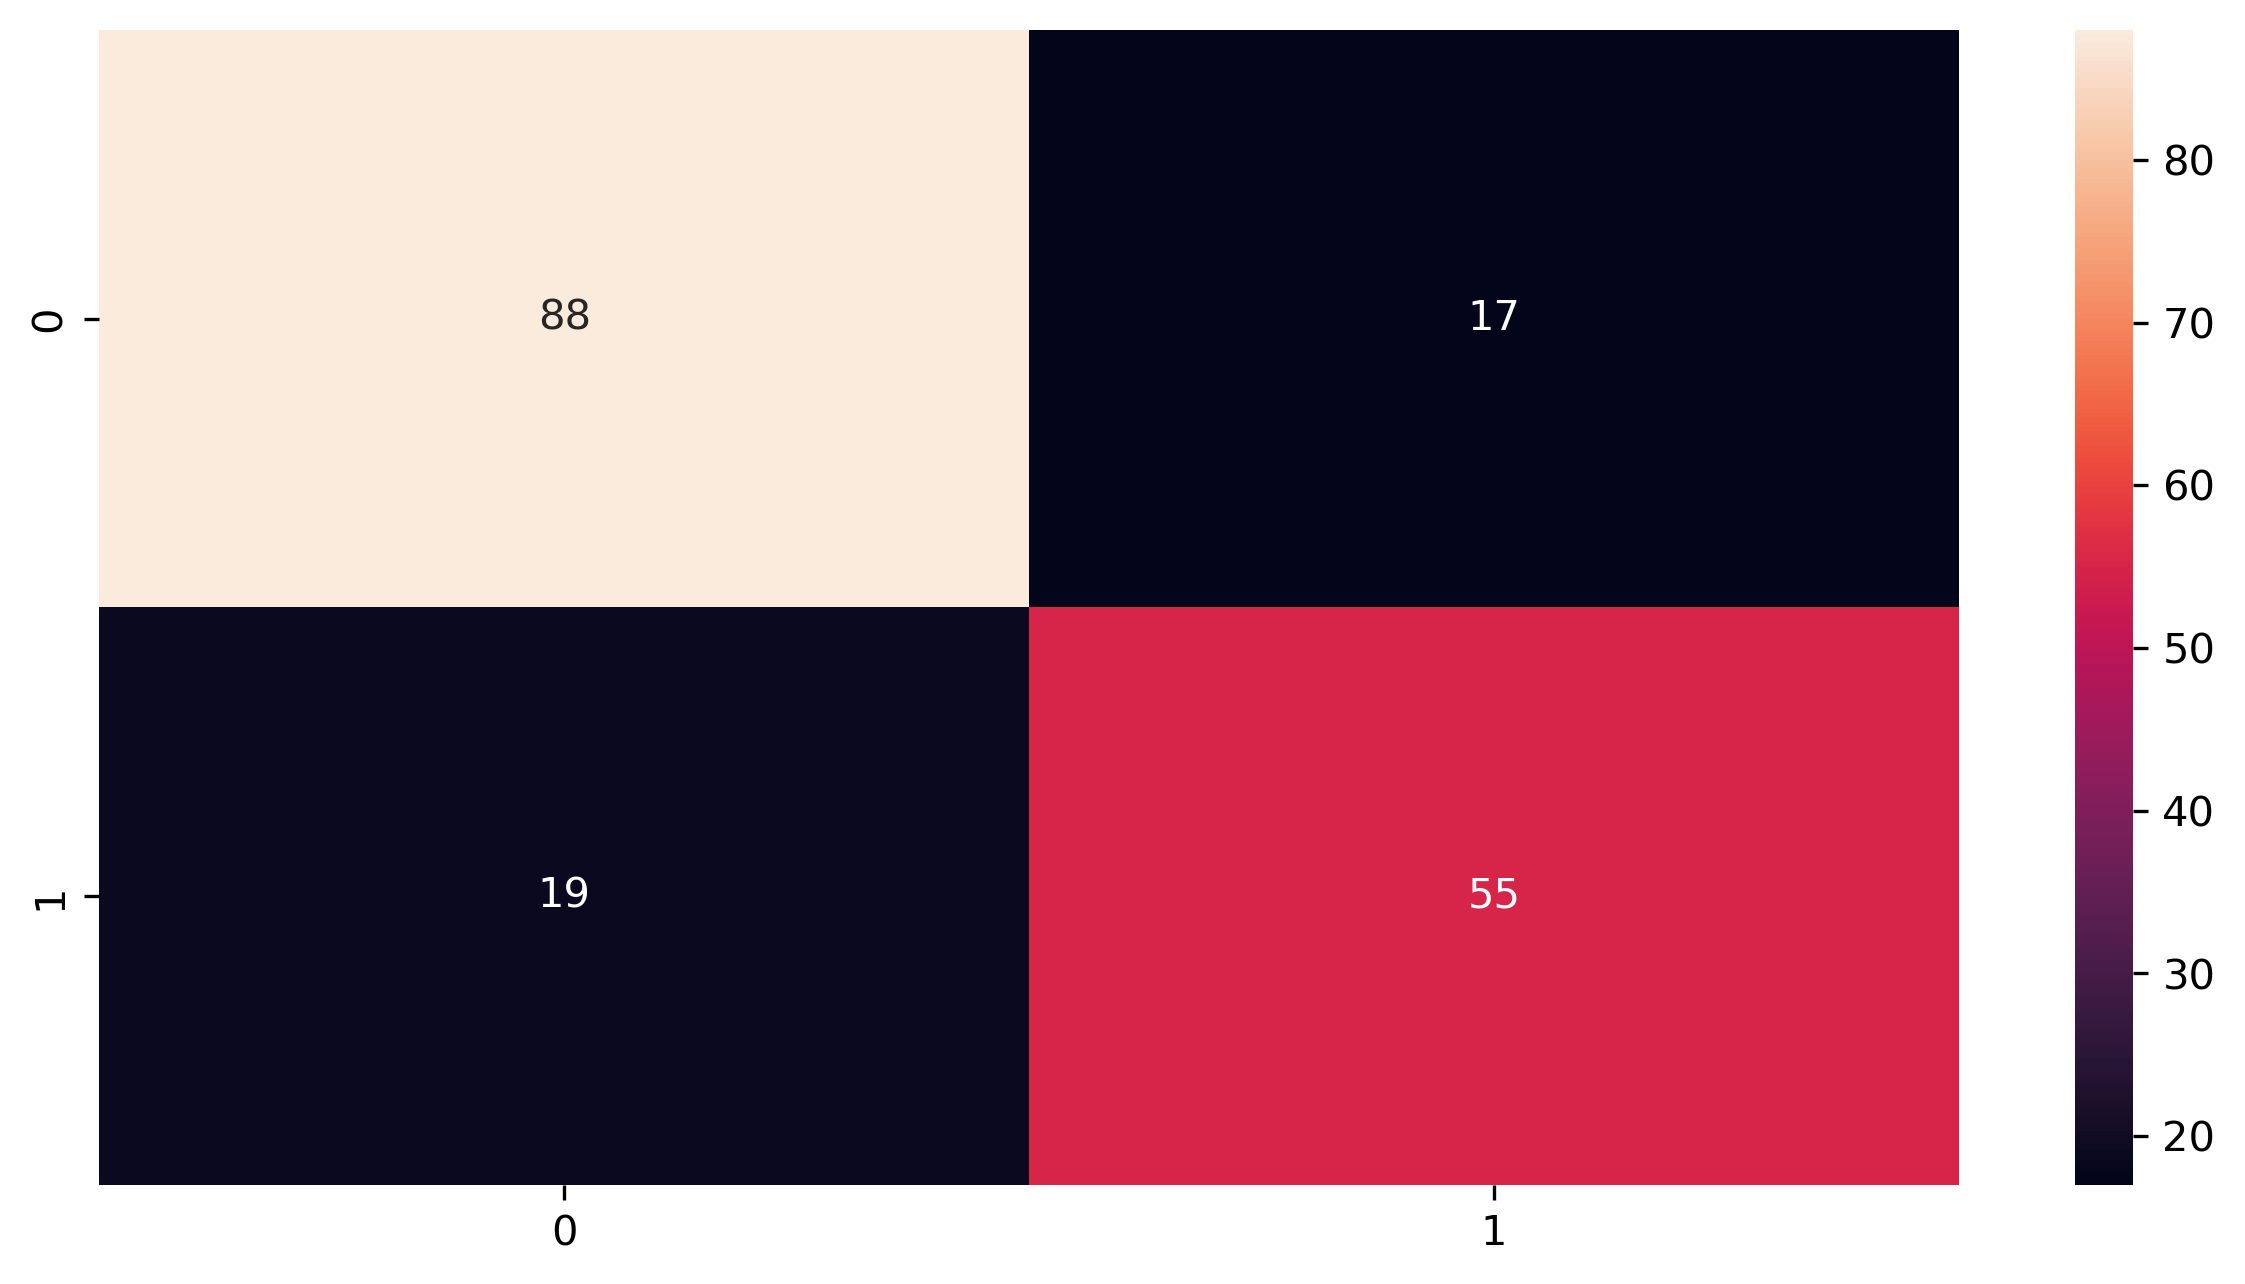

In [443]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt = 'g')

In [444]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [445]:
roc_auc=roc_auc_score(ytest,ypred)

In [446]:
print(f'ROC AUC :{roc_auc}')

ROC AUC :0.7906692406692406


In [447]:
#Interview Questions (from the document)
#1. Difference between precision and recall: 
#Precision is the ratio of true positive predictions to the total predicted positives, while recall is the ratio of true positive predictions 
#to the actual positives.

#2.Importance of cross-validation:
#Cross-validation is a technique used to assess the generalizability of a model. It helps ensure that the model performs 
#well on unseen data and reduces the risk of overfitting